In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
# warnings.filterwarnings('ignore')

# pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt

In [87]:
### Train dataset
train = pd.read_csv('train.csv')
print('train_dim:', train.shape)
train.head()

train_dim: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [88]:
### Test Dataset
test = pd.read_csv('test.csv')
print('test_dim:', test.shape)
test.head()

test_dim: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [89]:
### Combine train and test data

data = pd.concat([train.drop('SalePrice', axis=1), test], axis=0)
print(data.shape)
data.head()

(2919, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [5]:
Total = data.isna().sum()
Percentage = data.isna().mean()
nan = pd.concat([Total, Percentage], axis=1,)
nan.columns = ['Total', 'Percentage']
nan[nan.Total>0].sort_values('Total', ascending=False)

,Total,Percentage
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageCond,159,0.054471
GarageYrBlt,159,0.054471


In [6]:
#Drop the columns which have more than 45% nan values
data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)
print(data.shape)
data.head()

(2919, 75)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal


In [7]:
#Categorical Features
categorical = [features for features in data.columns if data[features].dtypes=='O']
print('number of categorical features', len(categorical))
data[categorical].head()

number of categorical features 38


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [8]:
categorical_Total = data[categorical].isna().sum()
categorical_percentage = data[categorical].isna().mean()
categorical_nan = pd.concat([categorical_Total, categorical_percentage], axis=1)
categorical_nan.columns = ['categorical_Total', 'categorical_percentage']
categorical_nan = categorical_nan[categorical_nan['categorical_Total']>0].sort_values('categorical_Total', ascending=False)
categorical_nan

,categorical_Total,categorical_percentage
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageFinish,159,0.054471
GarageType,157,0.053786
BsmtCond,82,0.028092
BsmtExposure,82,0.028092
BsmtQual,81,0.027749
BsmtFinType2,80,0.027407
BsmtFinType1,79,0.027064
MasVnrType,24,0.008222


In [9]:
#Nan imputation for categorical features

col = categorical_nan.index
for column in col:
    mode = train[column].mode()[0]
    data[column] = data[column].fillna(mode)
    

In [10]:
data[categorical].isna().sum()[data[categorical].isna().sum()>0]

Series([], dtype: int64)

In [11]:
#Temporal variable
data_temporal = [features for features in data.columns if 'Yr' in features or 'Year' in features]
print('number of temporal variables:', len(data_temporal))
data[data_temporal].head()

number of temporal variables: 4


,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [12]:
Temporal_Total = data[data_temporal].isna().sum()
Temporal_percentage = data[data_temporal].isna().mean()
Temporal_nan = pd.concat([Temporal_Total, Temporal_percentage], axis=1)
Temporal_nan.columns = ['Temporal_Total', 'Temporal_percentage']
Temporal_nan = Temporal_nan[Temporal_nan['Temporal_Total']>0].sort_values('Temporal_Total', ascending=False)
Temporal_nan

,Temporal_Total,Temporal_percentage
GarageYrBlt,159,0.054471


In [13]:
#NAN imputation for temporal variables
mode = data['GarageYrBlt'].mode()
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(int(mode))

In [14]:
data[data_temporal].isna().sum()[data[data_temporal].isna().sum()>0]

Series([], dtype: int64)

In [15]:
#Numericaal Features
data_numerical = [features for features in data.columns if data[features].dtypes != 'O' and features not in data_temporal]
print('Number of Numerical Features:', len(data_numerical))
data[data_numerical].head()

Number of Numerical Features: 33


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,1,60,65.0,8450,7,5,196.0,706.0,0.0,150.0,...,2.0,548.0,0,61,0,0,0,0,0,2
1,2,20,80.0,9600,6,8,0.0,978.0,0.0,284.0,...,2.0,460.0,298,0,0,0,0,0,0,5
2,3,60,68.0,11250,7,5,162.0,486.0,0.0,434.0,...,2.0,608.0,0,42,0,0,0,0,0,9
3,4,70,60.0,9550,7,5,0.0,216.0,0.0,540.0,...,3.0,642.0,0,35,272,0,0,0,0,2
4,5,60,84.0,14260,8,5,350.0,655.0,0.0,490.0,...,3.0,836.0,192,84,0,0,0,0,0,12


In [16]:
Numerical_Total = data[data_numerical].isna().sum()
Numerical_percentage = data[data_numerical].isna().mean()
Numerical_nan = pd.concat([Numerical_Total, Numerical_percentage], axis=1)
Numerical_nan.columns = ['Numerical_Total', 'Numerical_percentage']
Numerical_nan = Numerical_nan[Numerical_nan['Numerical_Total']>0].sort_values('Numerical_Total', ascending=False)
Numerical_nan

,Numerical_Total,Numerical_percentage
LotFrontage,486,0.166495
MasVnrArea,23,0.007879
BsmtFullBath,2,0.000685
BsmtHalfBath,2,0.000685
BsmtFinSF1,1,0.000343
BsmtFinSF2,1,0.000343
BsmtUnfSF,1,0.000343
TotalBsmtSF,1,0.000343
GarageCars,1,0.000343
GarageArea,1,0.000343


In [17]:
#NAN imputation for numerical
col = Numerical_nan.index
for column in col:
    median = data[column].median()
    data[column] = data[column].fillna(median)

In [18]:
data[data_numerical].isna().sum()[data[data_numerical].isna().sum()>0]

Series([], dtype: int64)

In [19]:
for col in categorical:
    print(data[col].value_counts()/len(data))

RL         0.777321
RM         0.157588
FV         0.047619
RH         0.008907
C (all)    0.008565
Name: MSZoning, dtype: float64
Pave    0.995889
Grvl    0.004111
Name: Street, dtype: float64
Reg    0.636862
IR1    0.331620
IR2    0.026036
IR3    0.005481
Name: LotShape, dtype: float64
Lvl    0.898253
HLS    0.041110
Bnk    0.040082
Low    0.020555
Name: LandContour, dtype: float64
AllPub    0.999657
NoSeWa    0.000343
Name: Utilities, dtype: float64
Inside     0.730730
Corner     0.175060
CulDSac    0.060295
FR2        0.029120
FR3        0.004796
Name: LotConfig, dtype: float64
Gtl    0.951696
Mod    0.042823
Sev    0.005481
Name: LandSlope, dtype: float64
NAmes      0.151764
CollgCr    0.091470
OldTown    0.081877
Edwards    0.066461
Somerst    0.062350
NridgHt    0.056869
Gilbert    0.056526
Sawyer     0.051730
NWAmes     0.044878
SawyerW    0.042823
Mitchel    0.039054
BrkSide    0.036999
Crawfor    0.035286
IDOTRR     0.031860
Timber     0.024666
NoRidge    0.024323
StoneBr    

In [20]:
data = data.drop(['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Functional', 'GarageQual'] ,axis=1)
data.shape

(2919, 66)

In [21]:
data[data_temporal].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [22]:
data['RemodAddYear'] = data['YrSold']-data['YearRemodAdd']
data['BuiltYear'] = data['YrSold']-data['YearBuilt']
data['GarageBltYear'] = data['YrSold']-data['GarageYrBlt']
data.drop(['YearBuilt','YearRemodAdd', 'GarageYrBlt', 'YrSold'], axis=1, inplace=True)



In [23]:
data['RemodAddYear'][data['RemodAddYear']<0] = 0
data['BuiltYear'][data['BuiltYear']<0] = 0
data['GarageBltYear'][data['GarageBltYear']<0] = 0

<ipython-input-23-952eebac7ceb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RemodAddYear'][data['RemodAddYear']<0] = 0
<ipython-input-23-952eebac7ceb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BuiltYear'][data['BuiltYear']<0] = 0
<ipython-input-23-952eebac7ceb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GarageBltYear'][data['GarageBltYear']<0] = 0


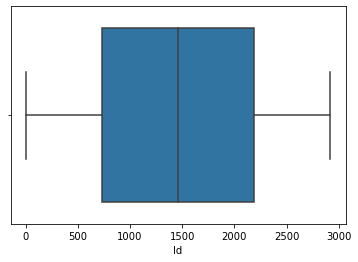

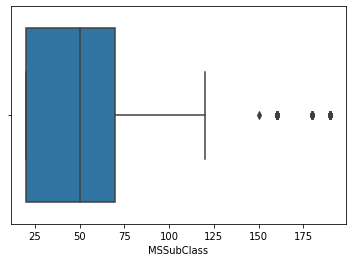

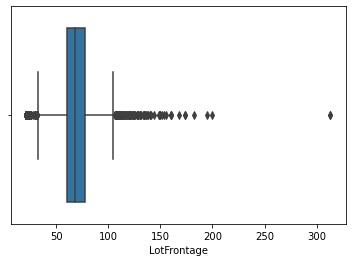

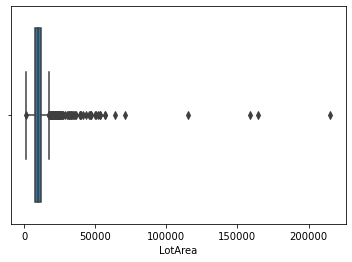

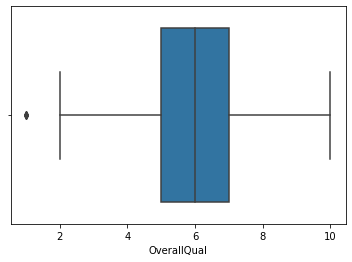

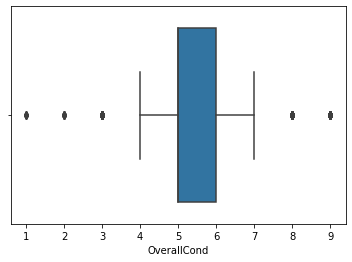

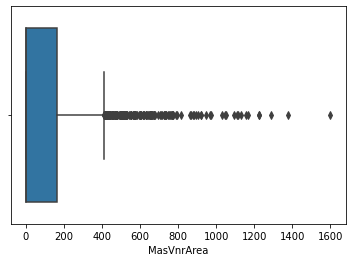

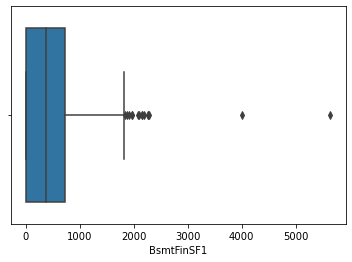

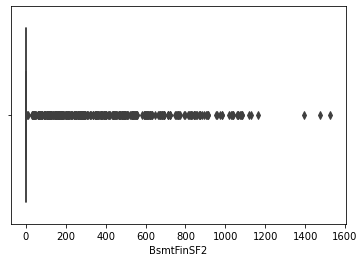

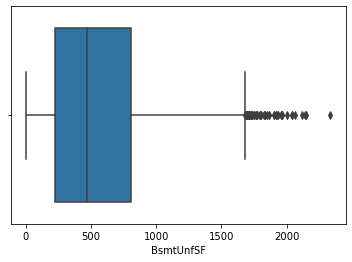

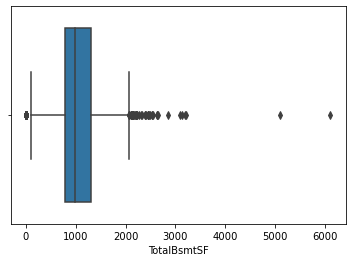

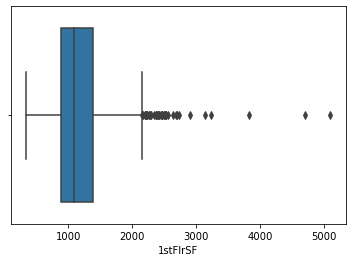

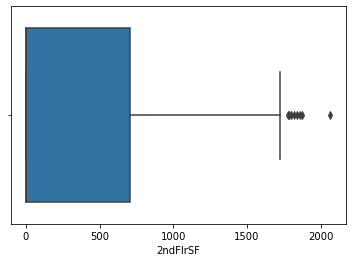

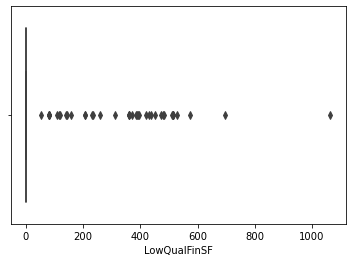

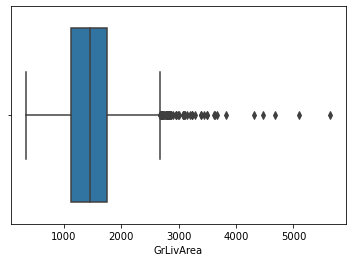

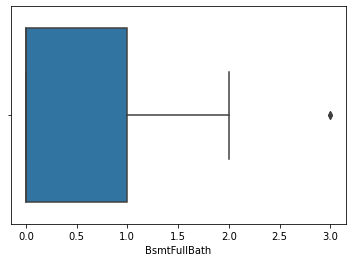

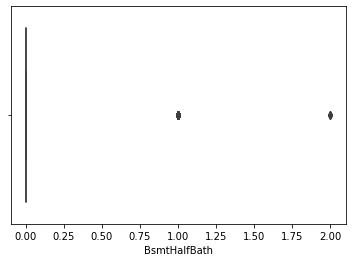

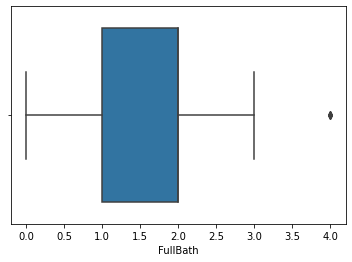

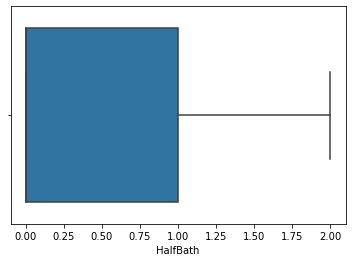

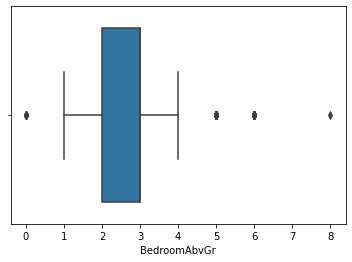

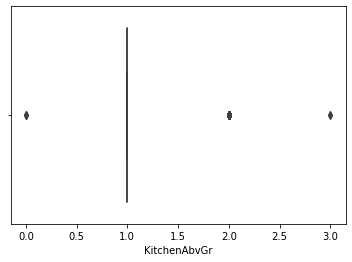

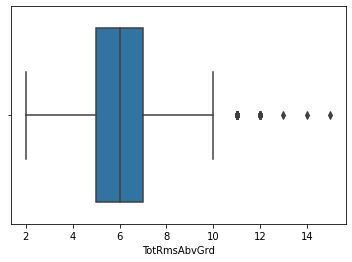

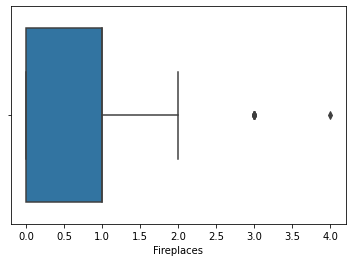

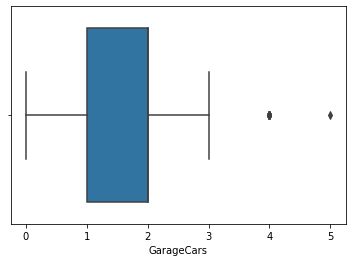

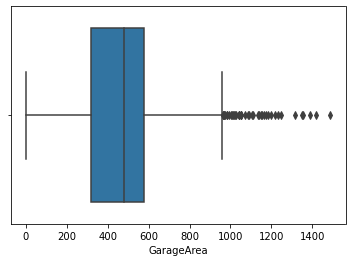

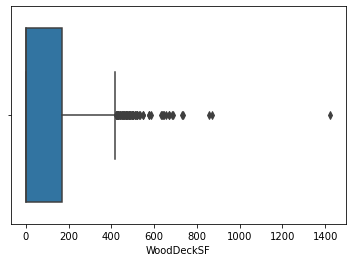

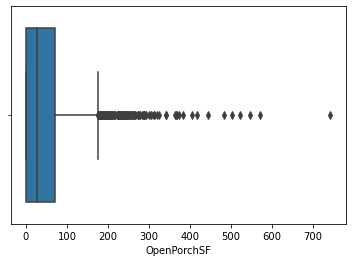

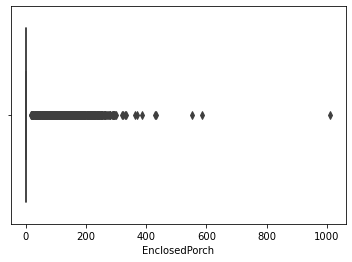

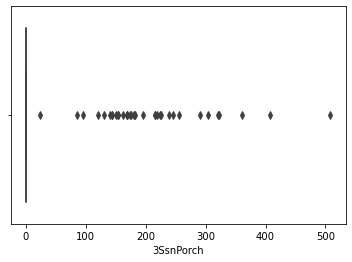

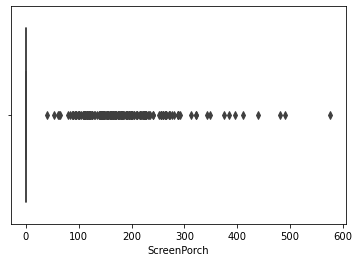

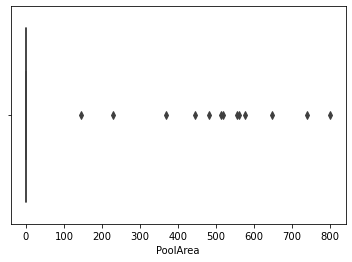

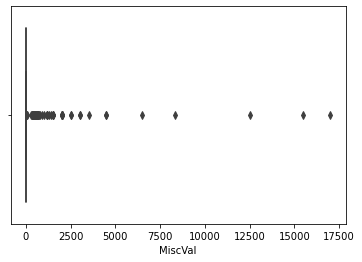

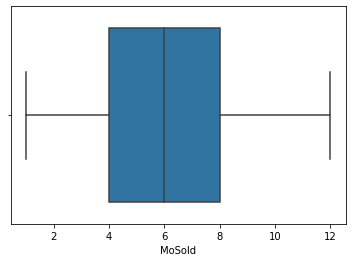

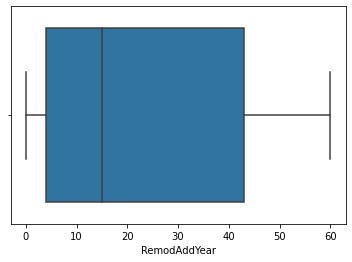

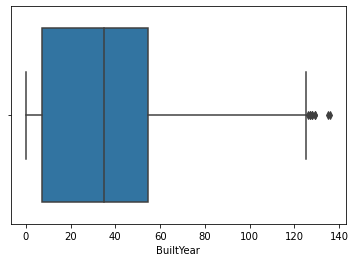

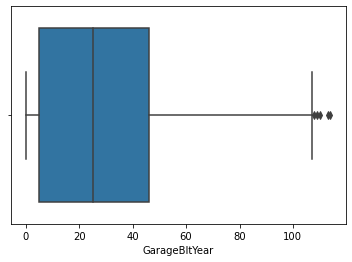

In [24]:
column = [col for col in data.columns if data[col].dtypes!='O']

for i in column:
    sns.boxplot(x=data[i])
    plt.show()

In [25]:
#### Lets compute the Interquantile range to calculate the boundaries

def Outlires_NonG(df, col):
    IQR=df[col].quantile(0.75)-df[col].quantile(0.25)

    lower_bridge=int(df[col].quantile(0.25)-(IQR*1.5))
    upper_bridge=int(df[col].quantile(0.75)+(IQR*1.5))

    df.loc[df[col]>upper_bridge, col] = upper_bridge
    df.loc[df[col]<lower_bridge, col] = lower_bridge

In [26]:
for col in column:
    Outlires_NonG(data, col)

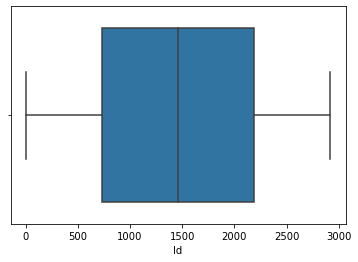

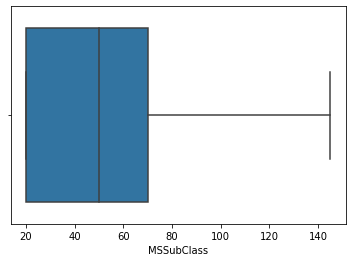

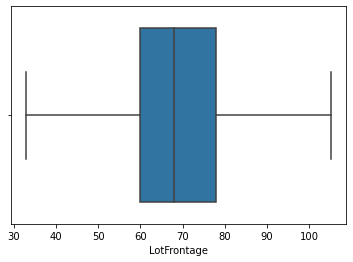

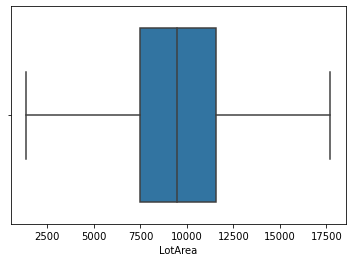

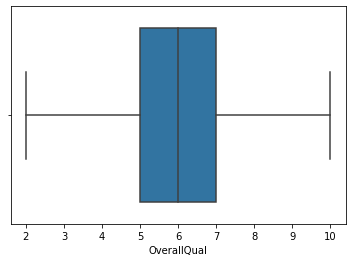

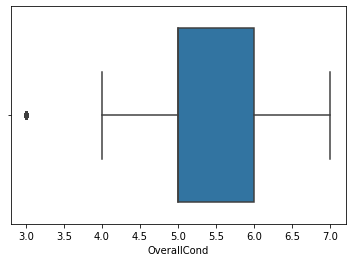

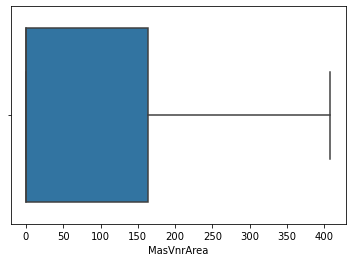

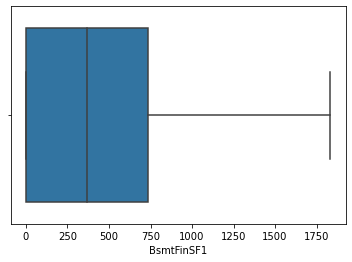

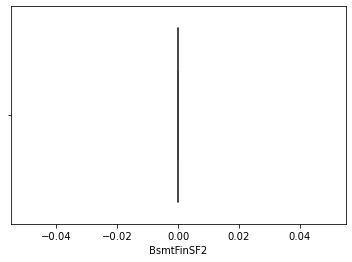

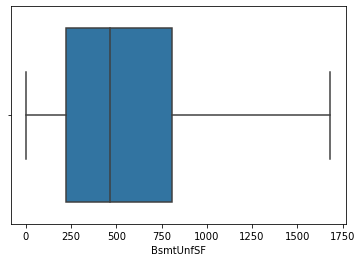

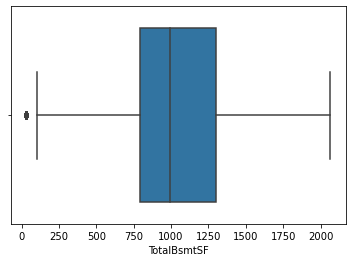

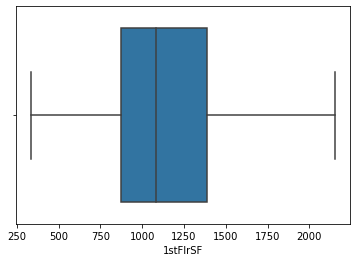

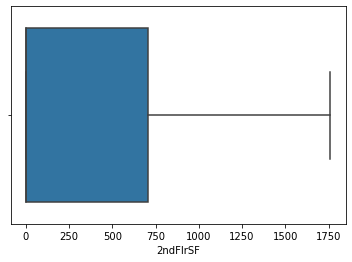

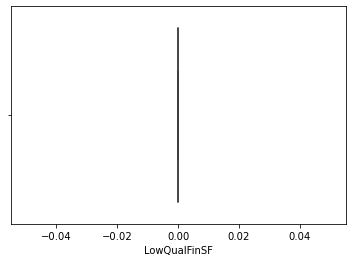

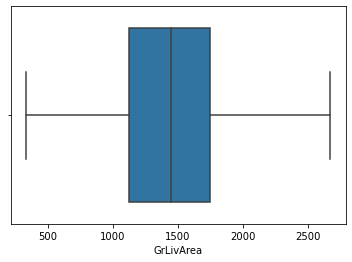

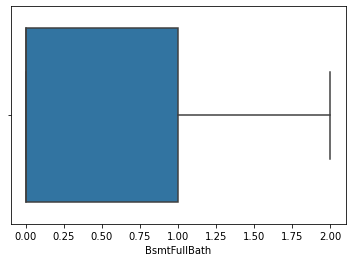

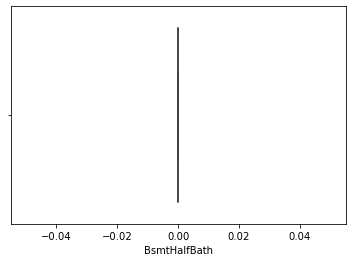

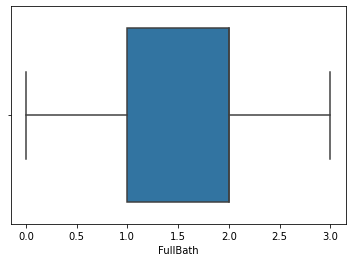

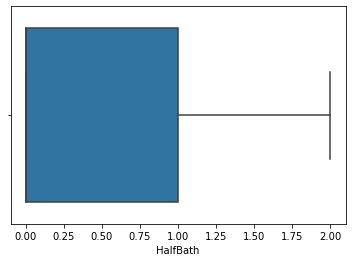

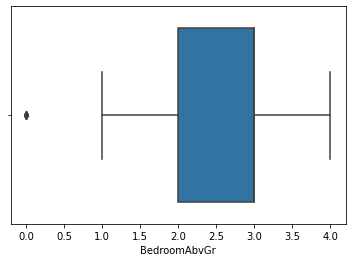

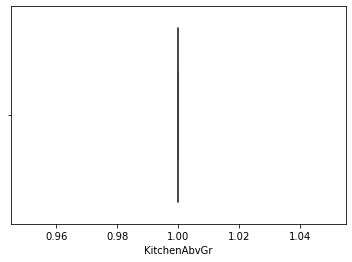

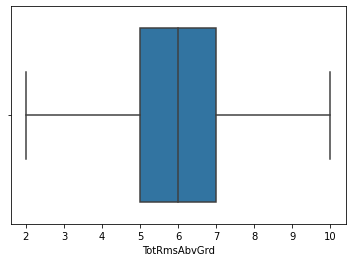

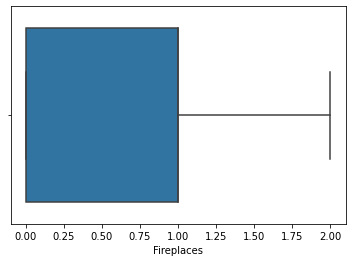

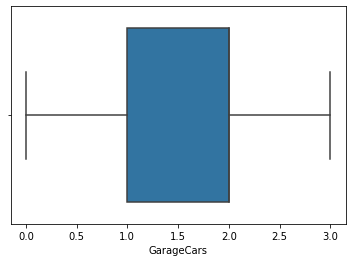

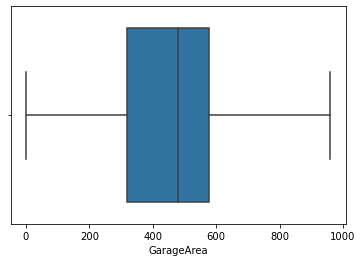

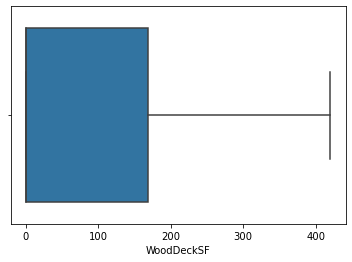

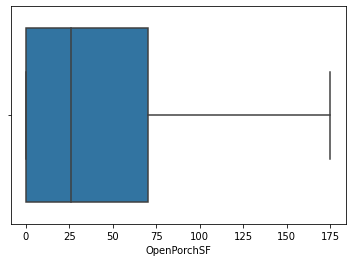

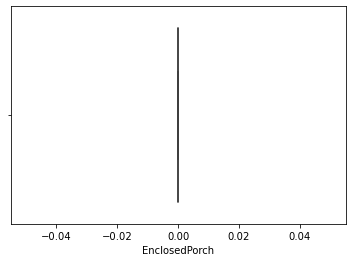

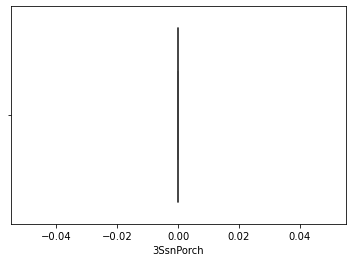

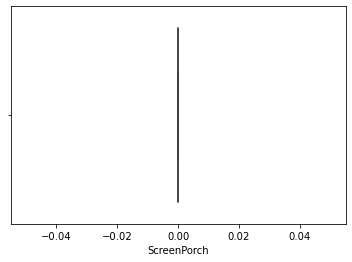

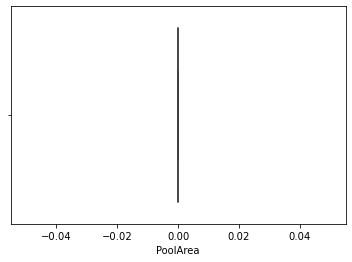

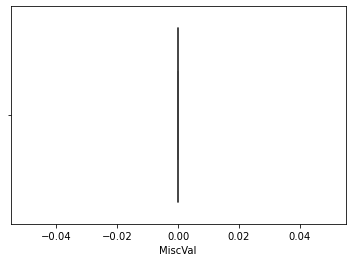

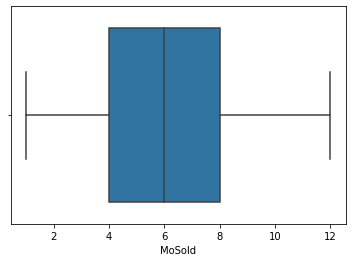

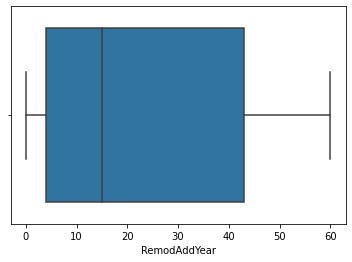

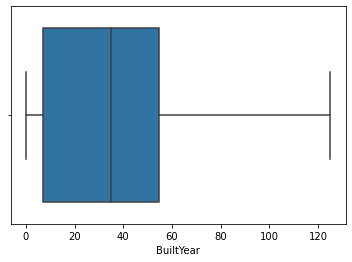

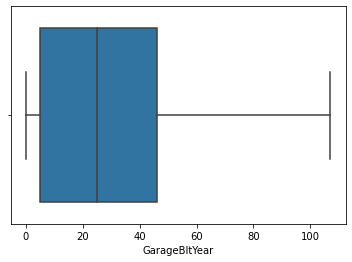

In [27]:
for i in column:
    sns.boxplot(x=data[i])
    plt.show()

In [28]:
data1 = data.copy()
data1.shape

(2919, 65)

In [29]:
#Normality check
import scipy.stats as stat
import pylab 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot

def plot_data(df,feature):
    con_col = []
    try:
        plt.figure(figsize=(15,5))
        plt.subplot(1,3,1)
        sns.distplot(df[feature])
        plt.subplot(1,3,2)
        df.boxplot(column=feature)
        plt.subplot(1,3,3)
        stat.probplot(df[feature],dist='norm',plot=pylab)
        plt.show()
    except:
        con_col.append(col)
    return con_col

In [30]:
def nor(df1, col):
    df = df1.copy()
    con_col1 = []
    try:
        df[col+'_log'] = np.log(df[col]+1)
        df[col+'_sqrt'] = df[col]**(1/2)
        df[col+'_exp'] = df[col]**(1/1.2)
        df[col+'_boxcox'],parameters = stat.boxcox(df[col]+1)

        plt.figure(figsize=(18,6))
        plt.subplot(1,4,1)
        stat.probplot(df[col+'_log'],dist='norm',plot=pylab)
        plt.subplot(1,4,2)
        stat.probplot(df[col+'_sqrt'],dist='norm',plot=pylab)
        plt.subplot(1,4,3)
        stat.probplot(df[col+'_exp'],dist='norm',plot=pylab)
        plt.subplot(1,4,4)
        stat.probplot(df[col+'_boxcox'],dist='norm',plot=pylab)
        plt.show()
    except:
        con_col1.append(col)
    return con_col1


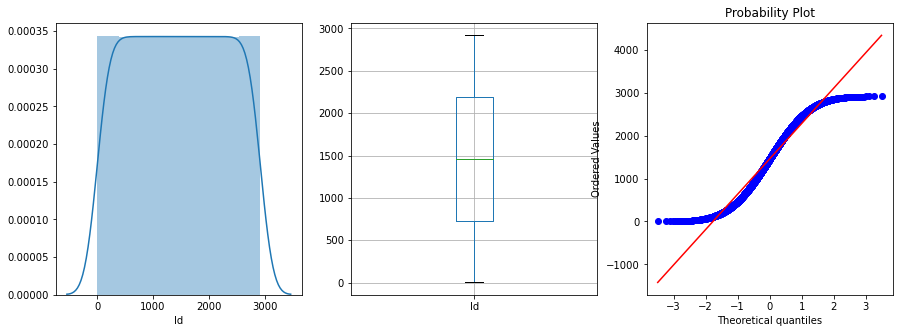

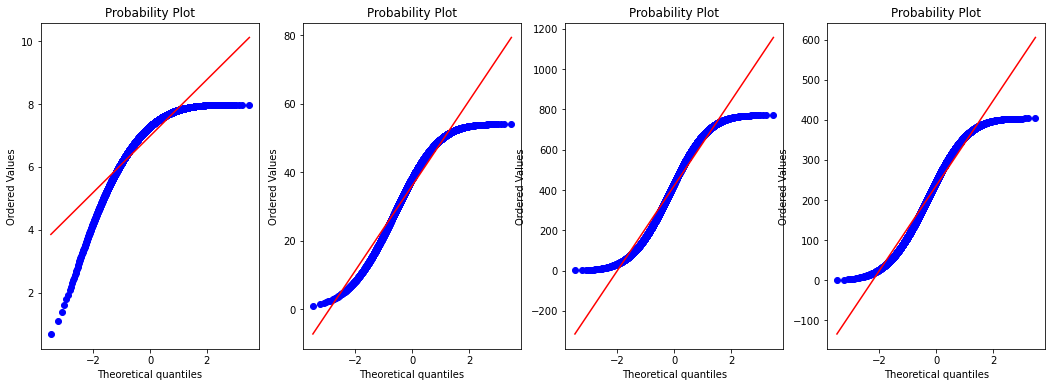

*****************************************************************************************************************************


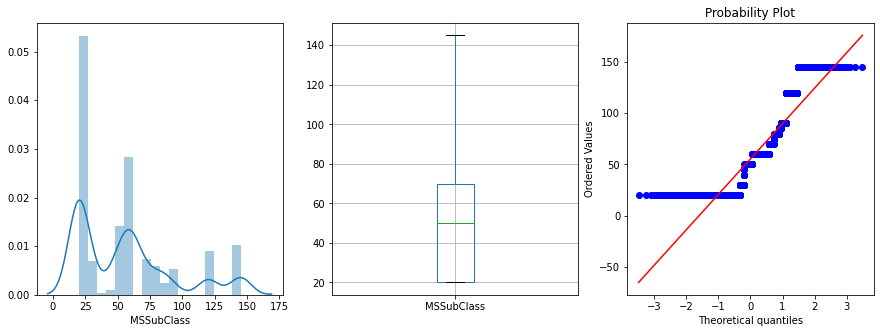

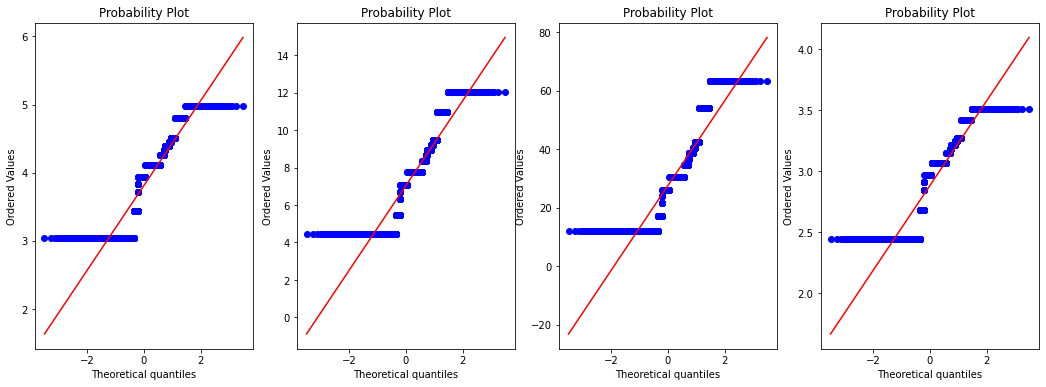

*****************************************************************************************************************************


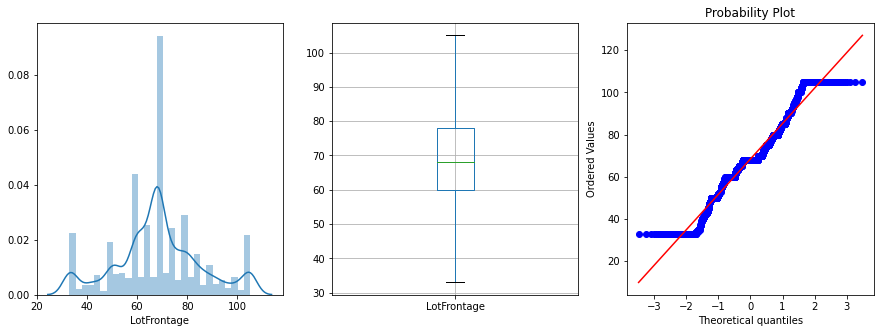

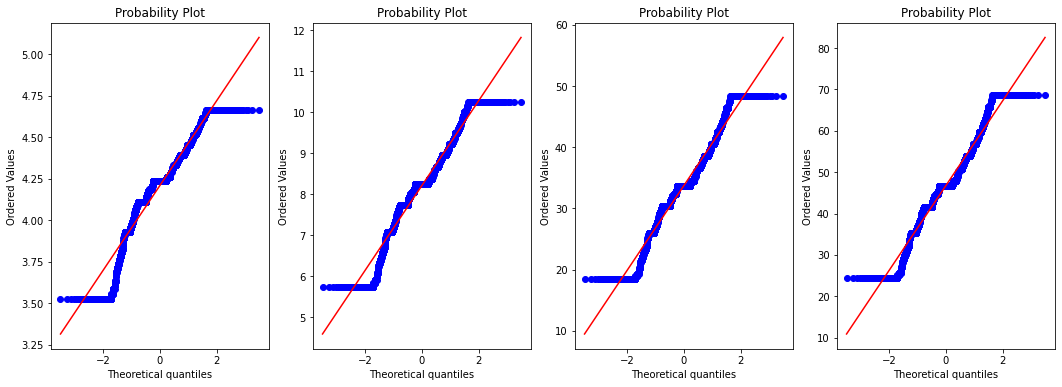

*****************************************************************************************************************************


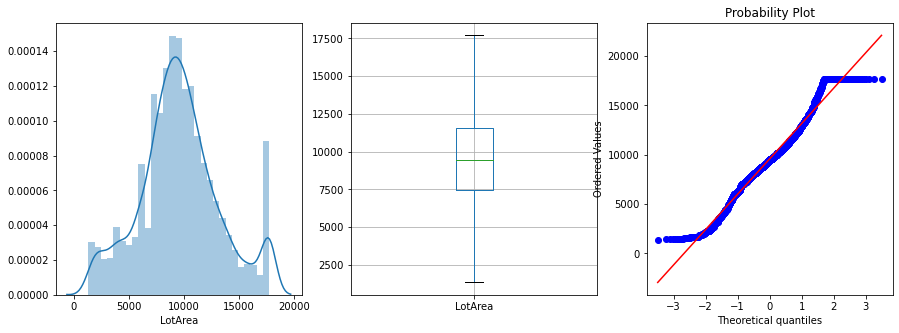

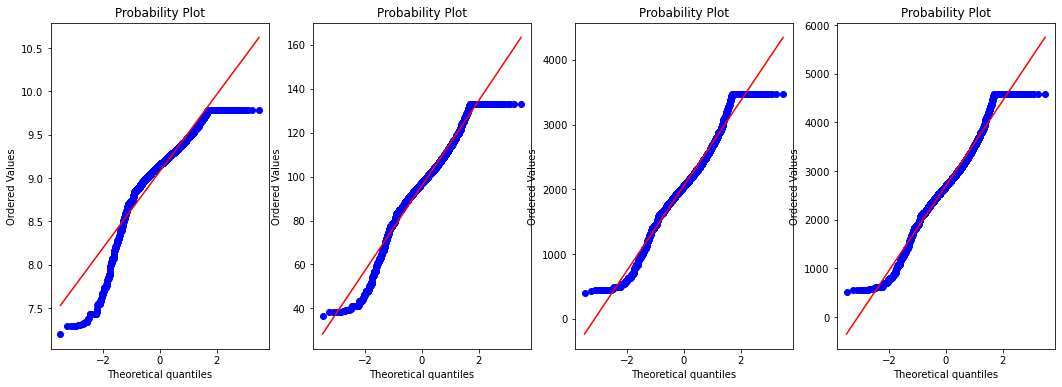

*****************************************************************************************************************************


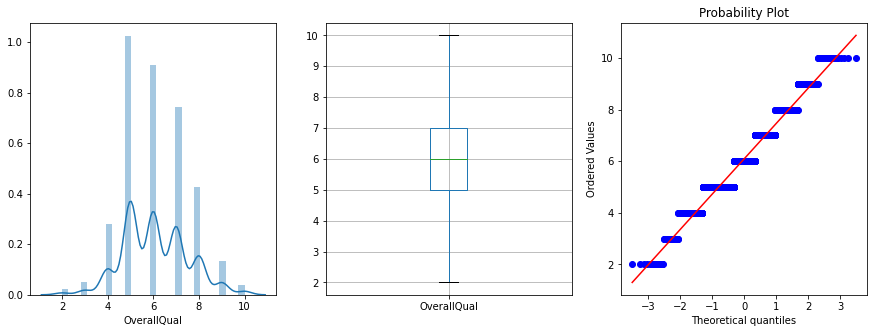

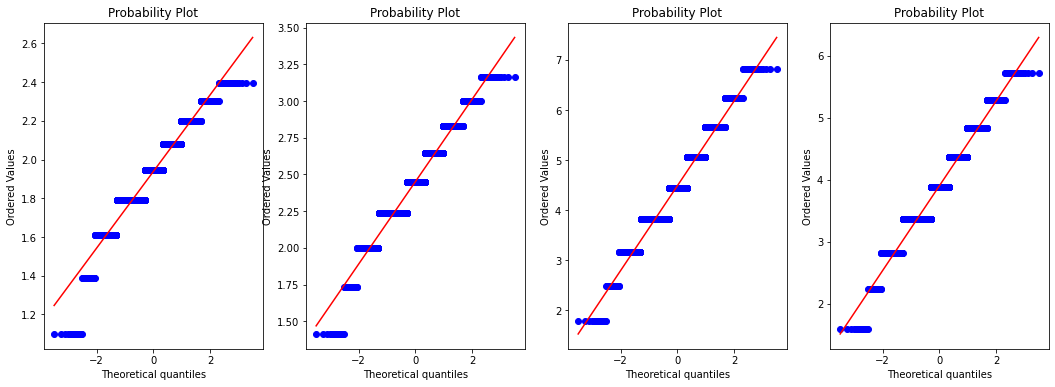

*****************************************************************************************************************************


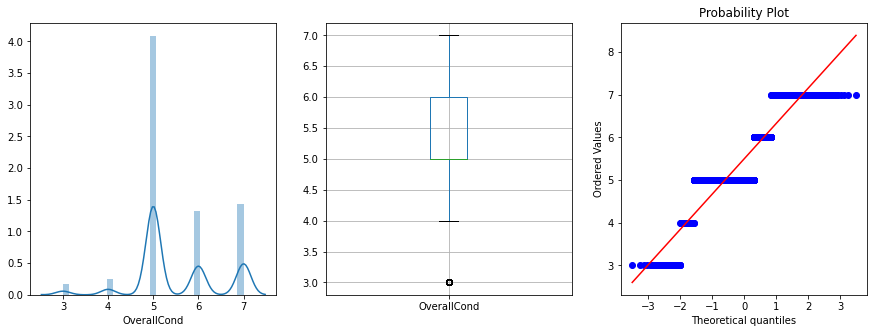

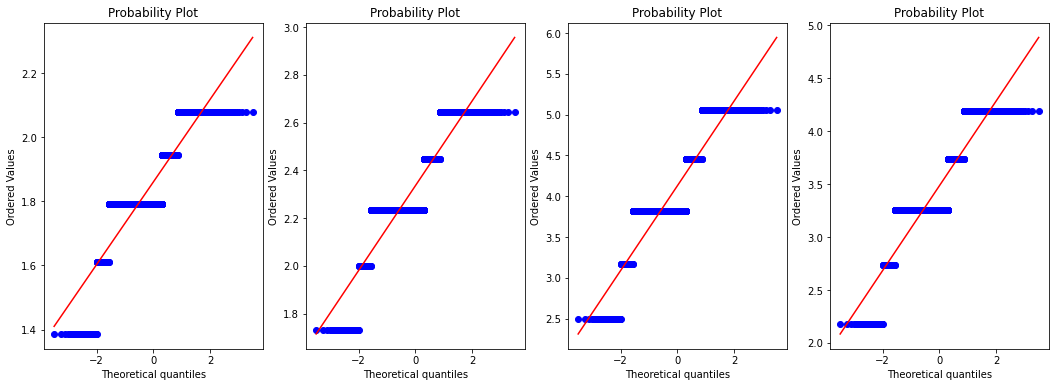

*****************************************************************************************************************************


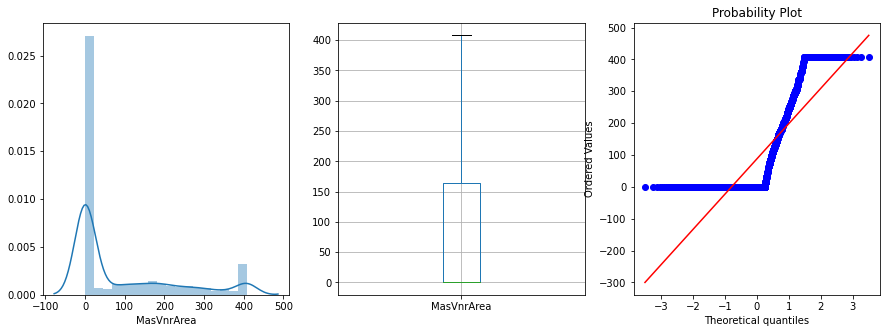

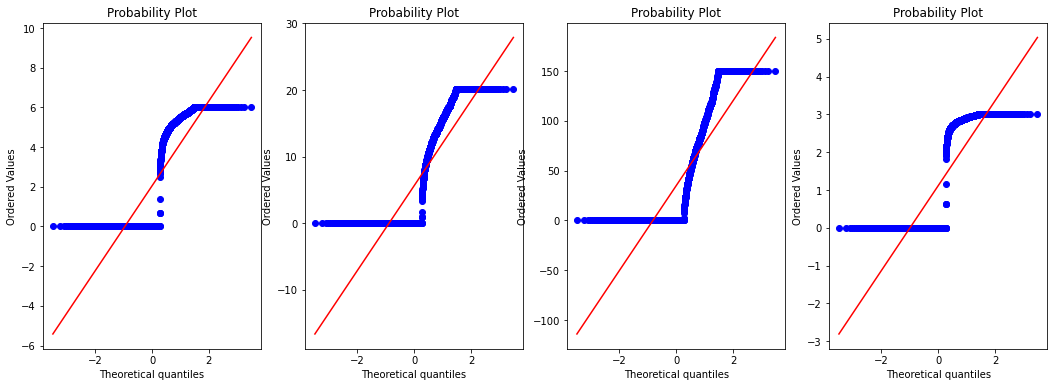

*****************************************************************************************************************************


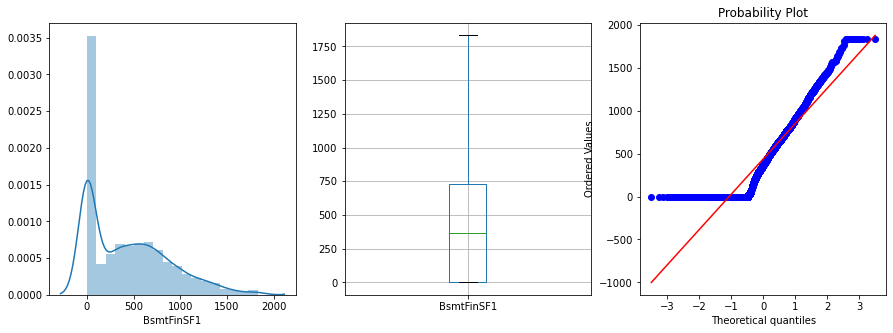

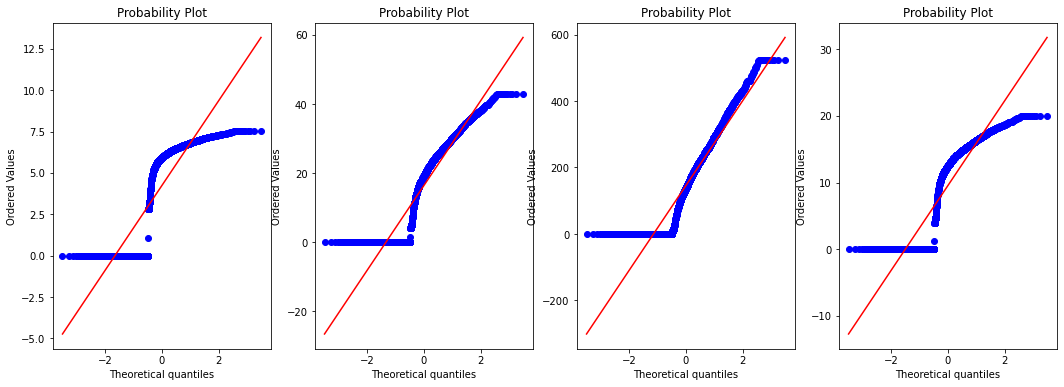

*****************************************************************************************************************************


C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


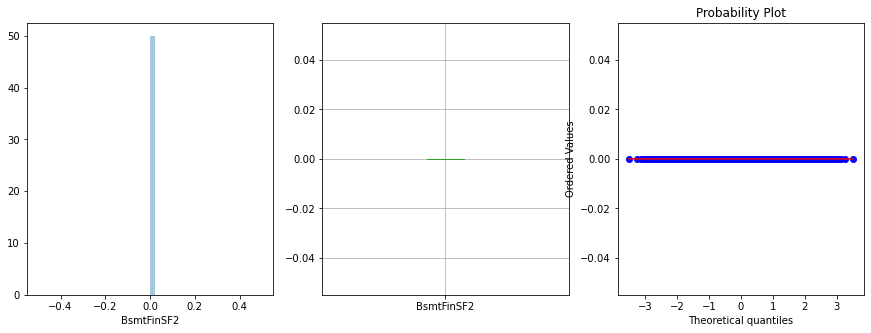

*****************************************************************************************************************************


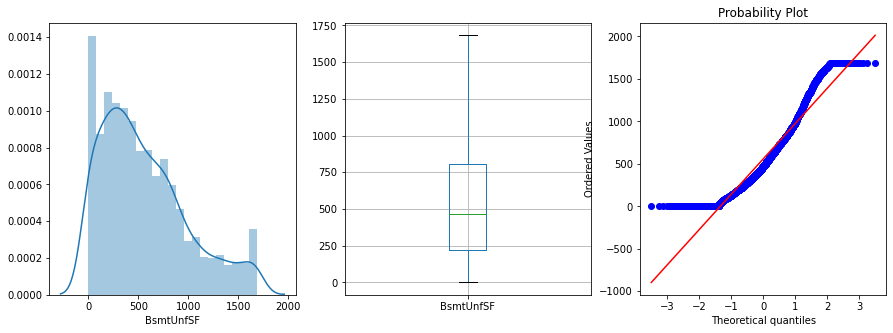

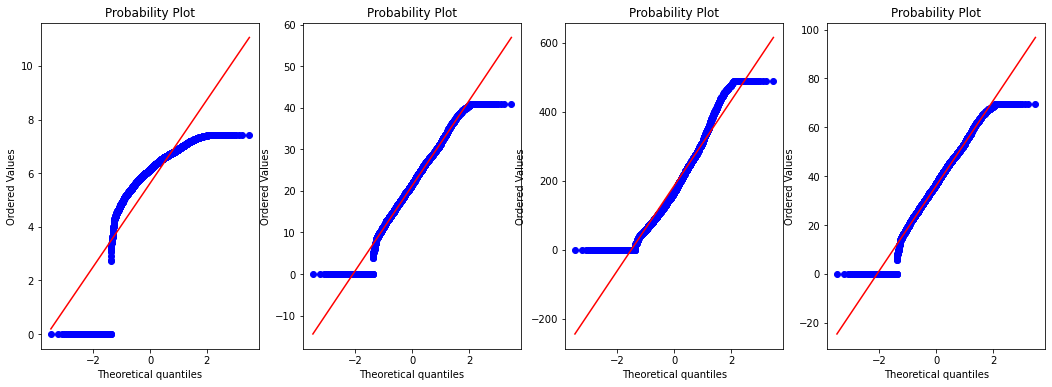

*****************************************************************************************************************************


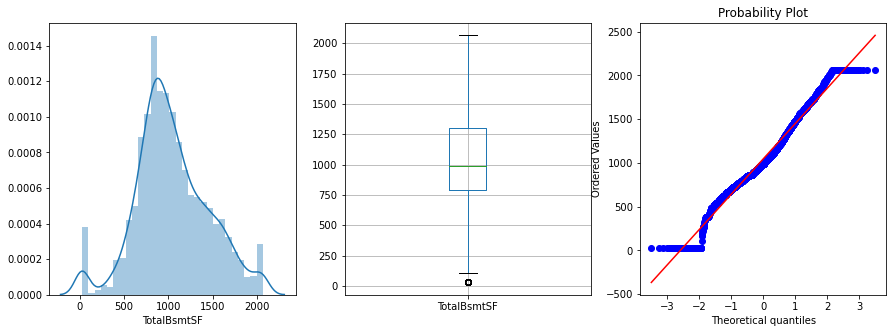

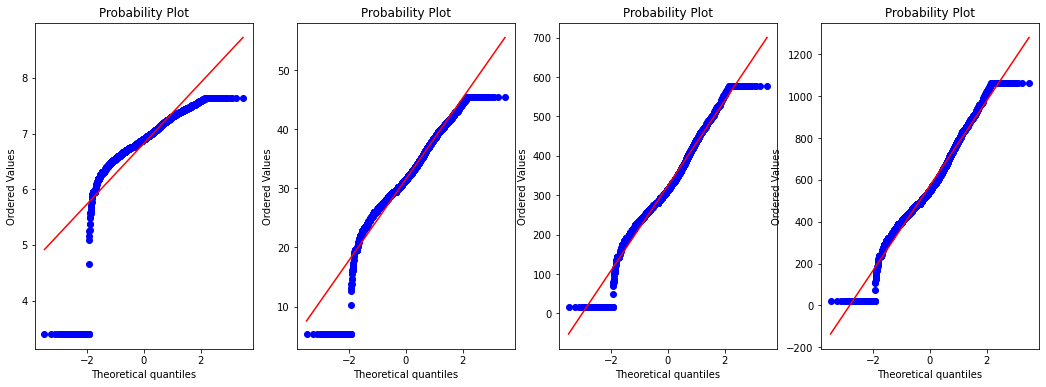

*****************************************************************************************************************************


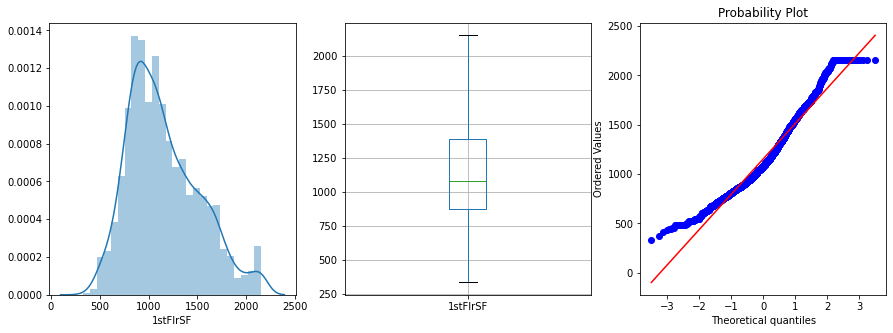

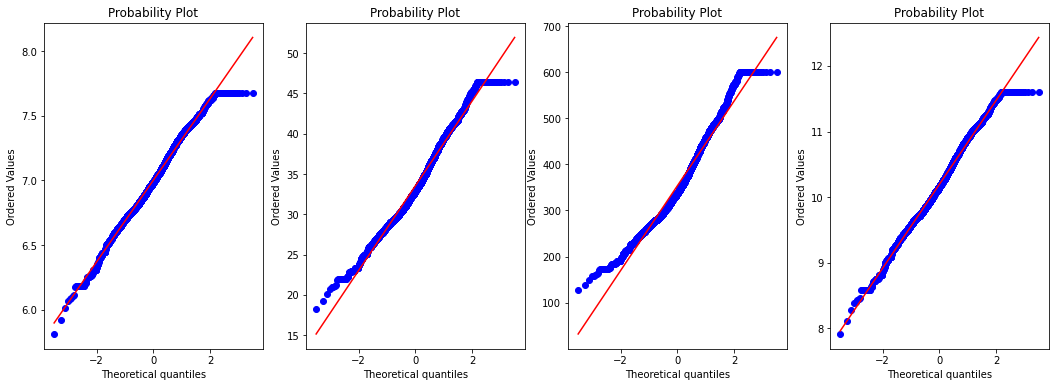

*****************************************************************************************************************************


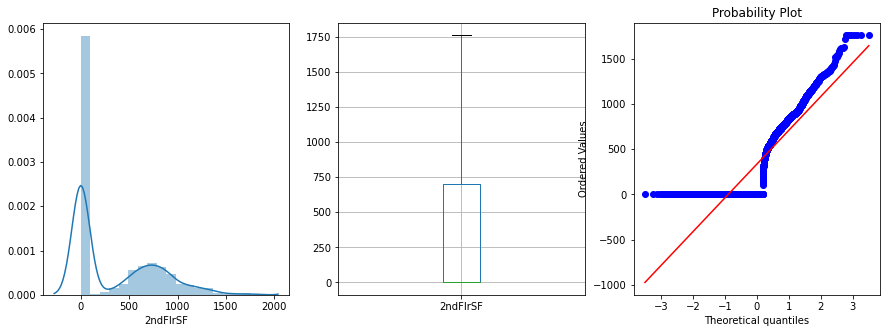

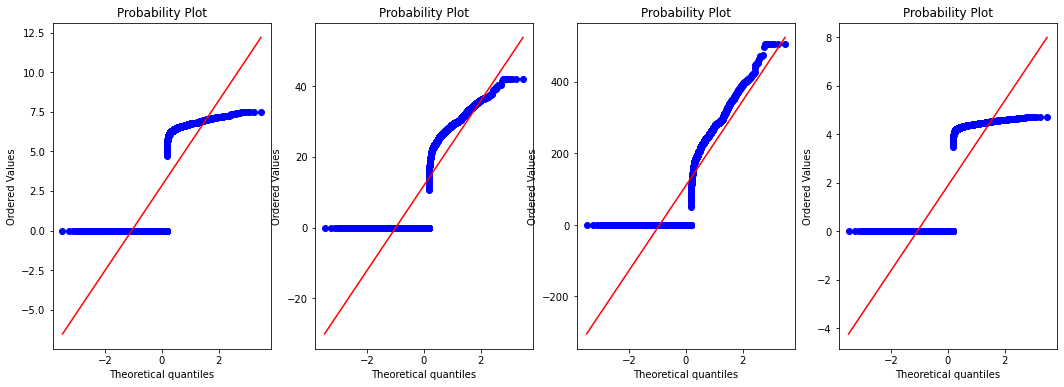

*****************************************************************************************************************************


C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


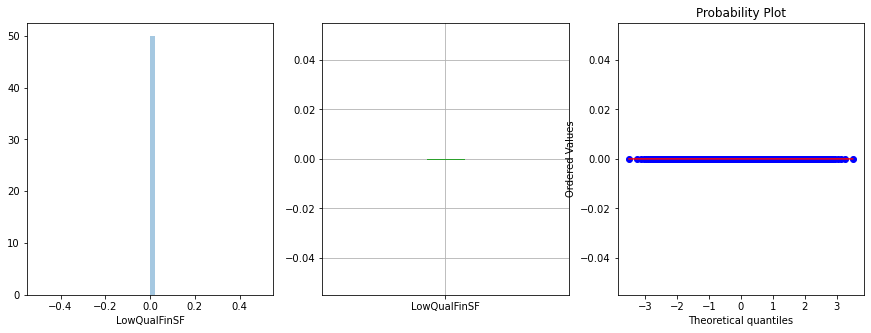

*****************************************************************************************************************************


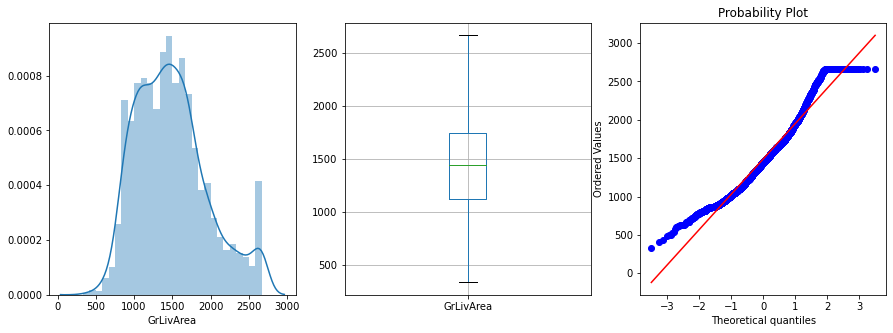

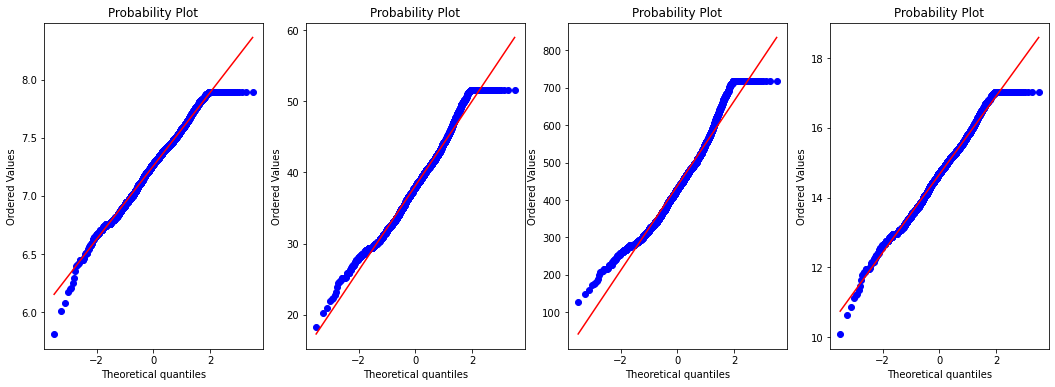

*****************************************************************************************************************************


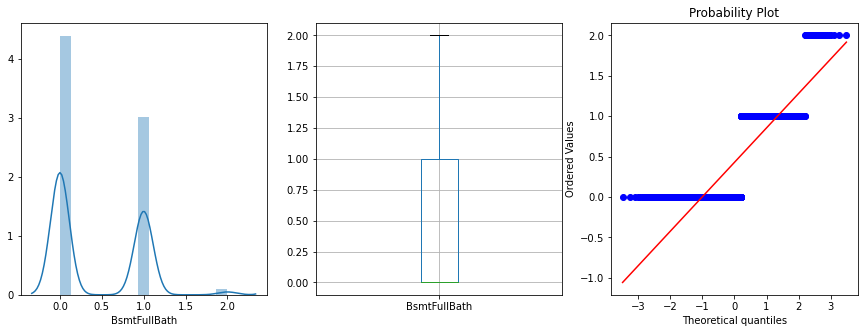

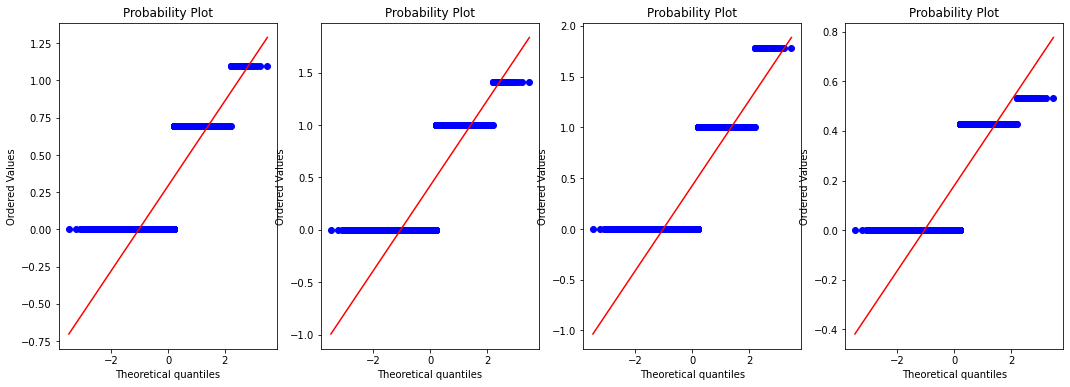

*****************************************************************************************************************************


C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


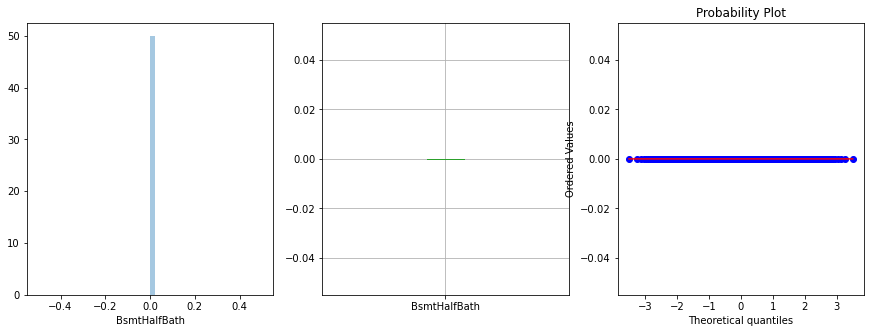

*****************************************************************************************************************************


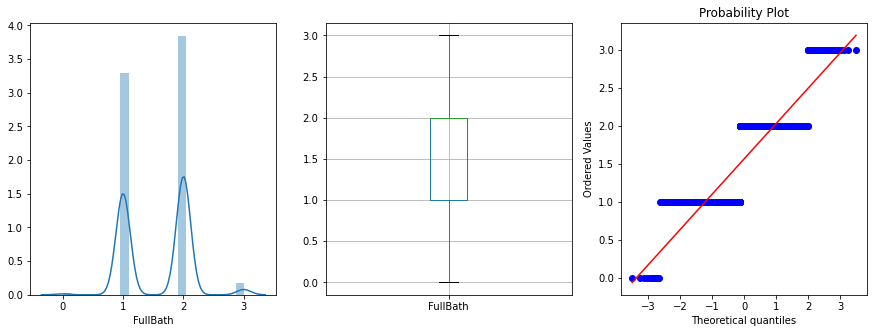

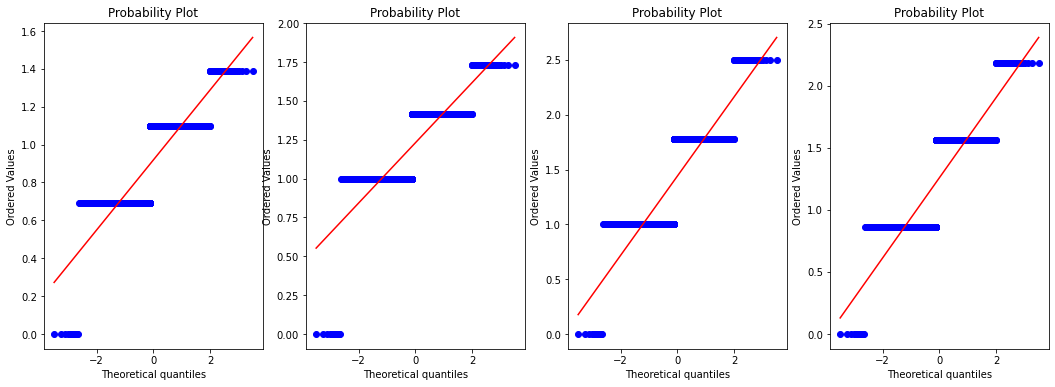

*****************************************************************************************************************************


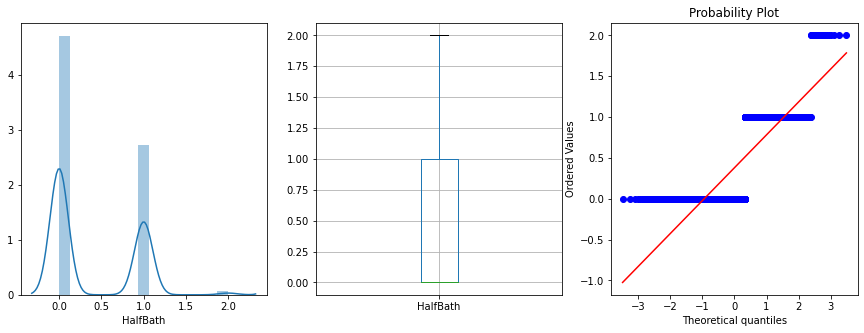

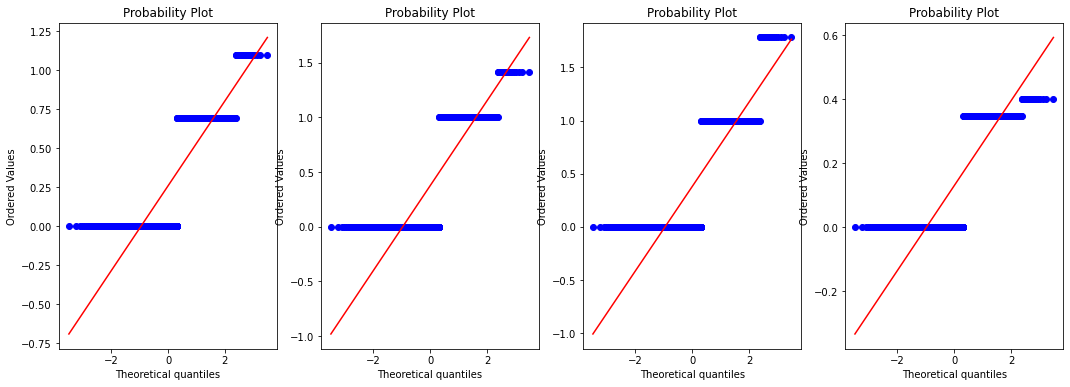

*****************************************************************************************************************************


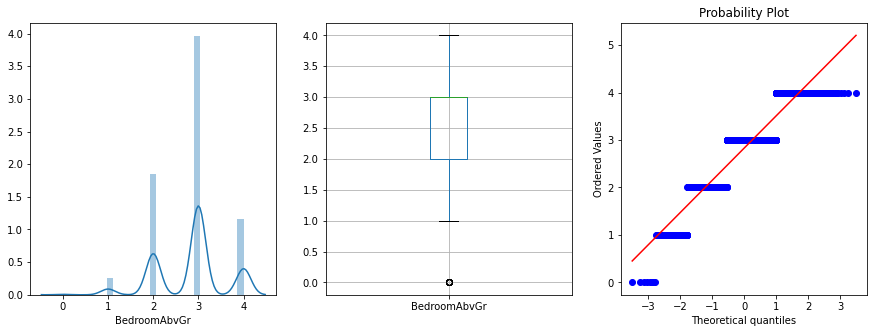

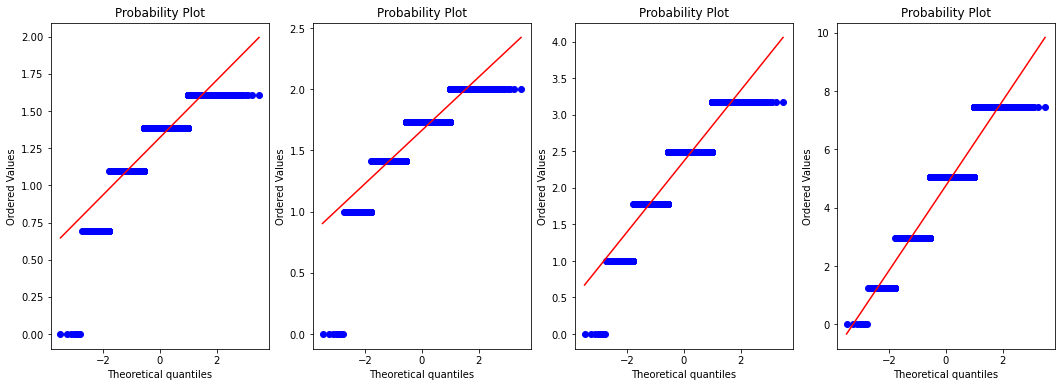

*****************************************************************************************************************************


C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


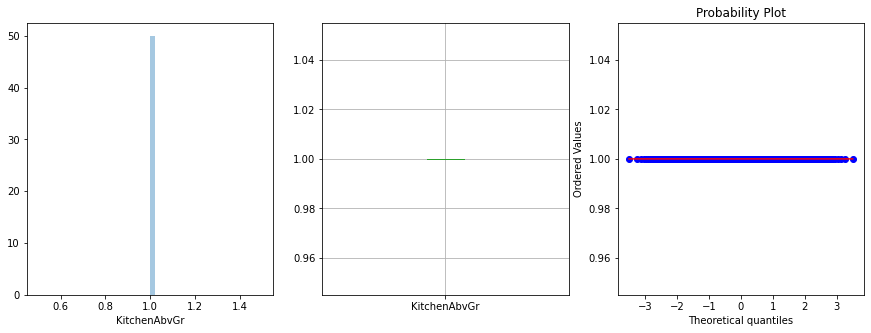

*****************************************************************************************************************************


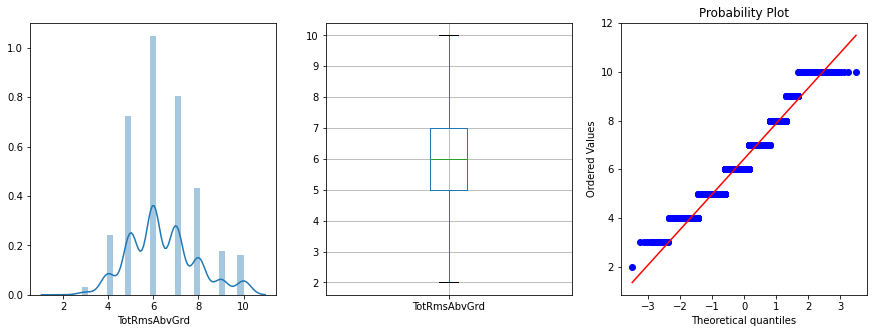

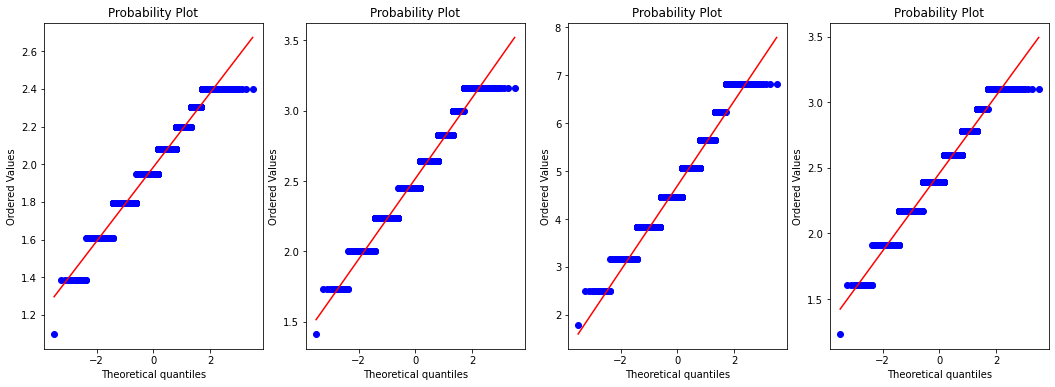

*****************************************************************************************************************************


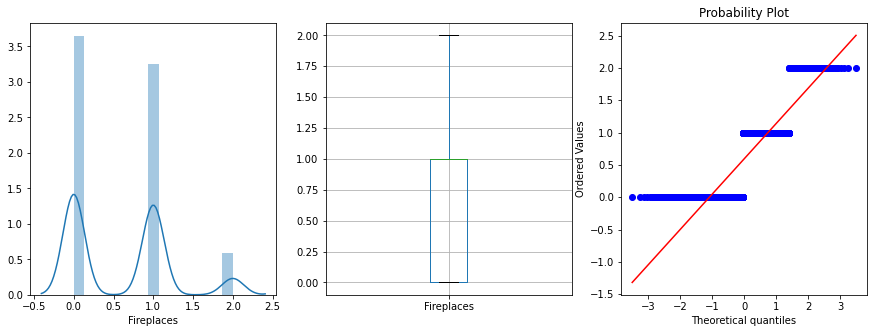

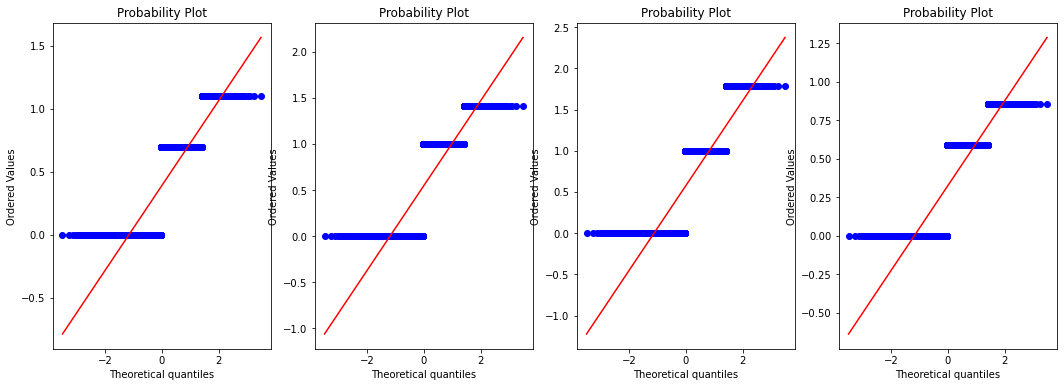

*****************************************************************************************************************************


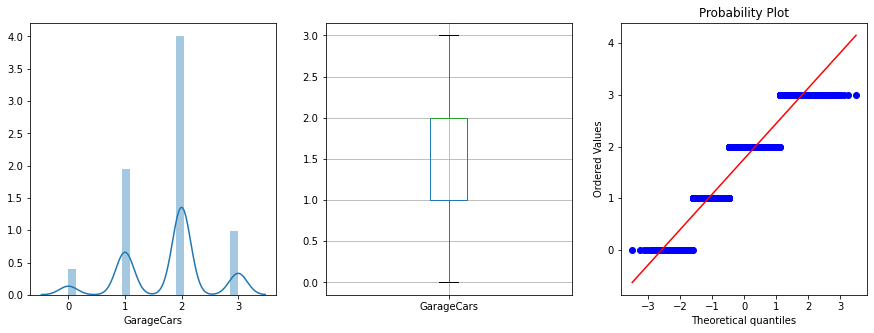

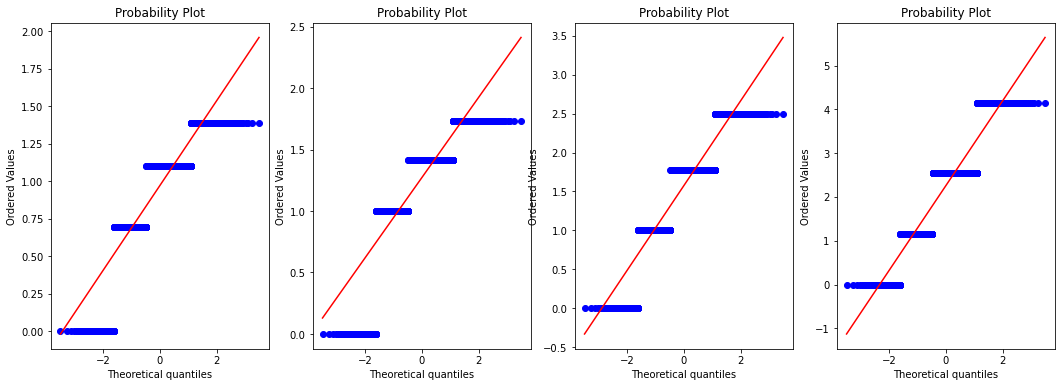

*****************************************************************************************************************************


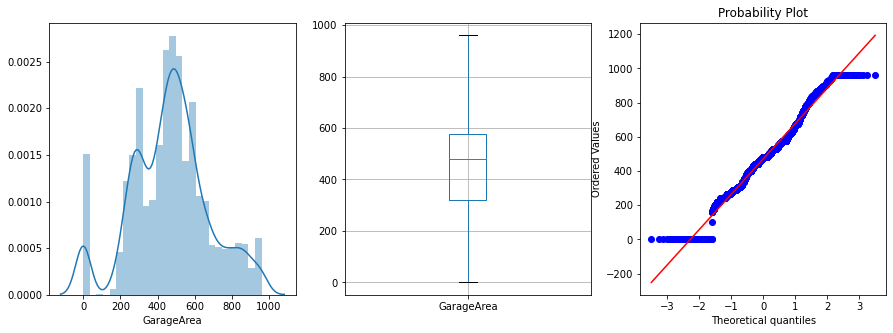

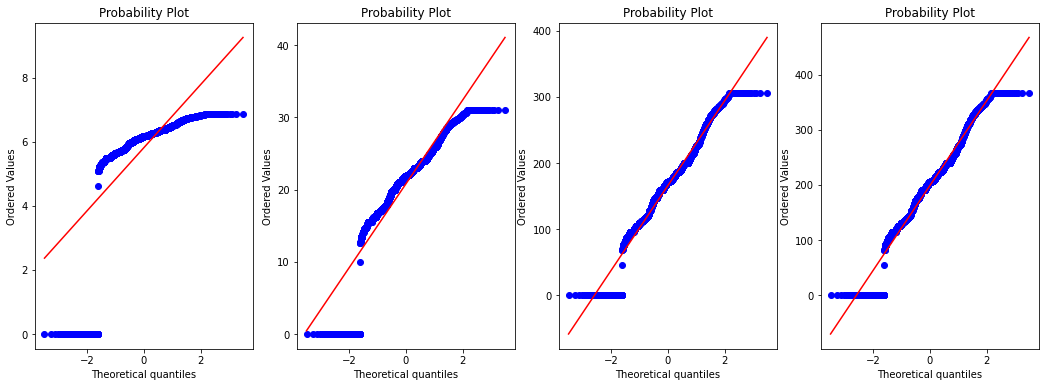

*****************************************************************************************************************************


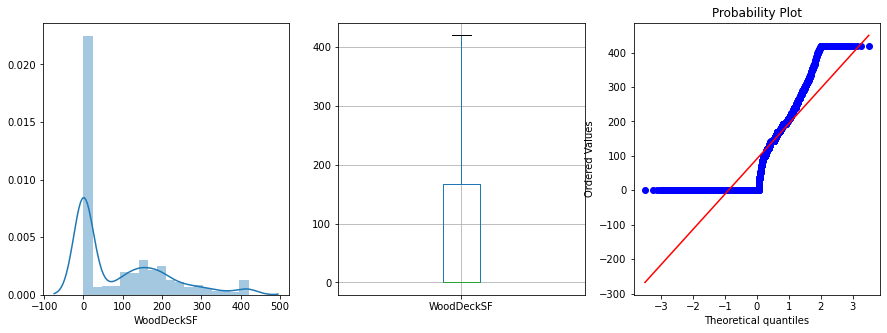

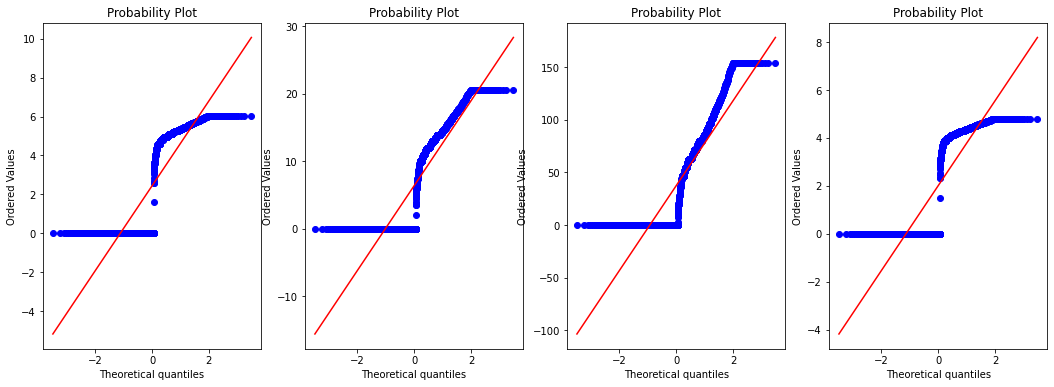

*****************************************************************************************************************************


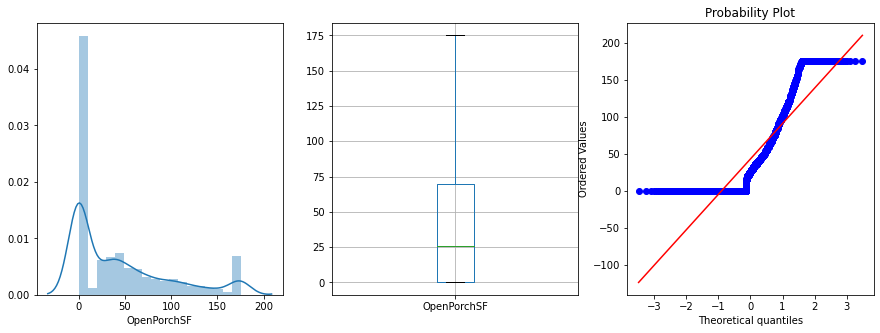

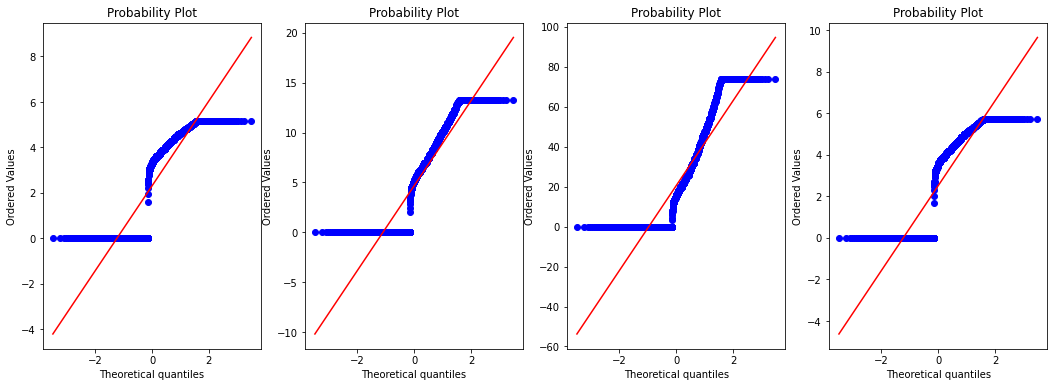

*****************************************************************************************************************************


C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


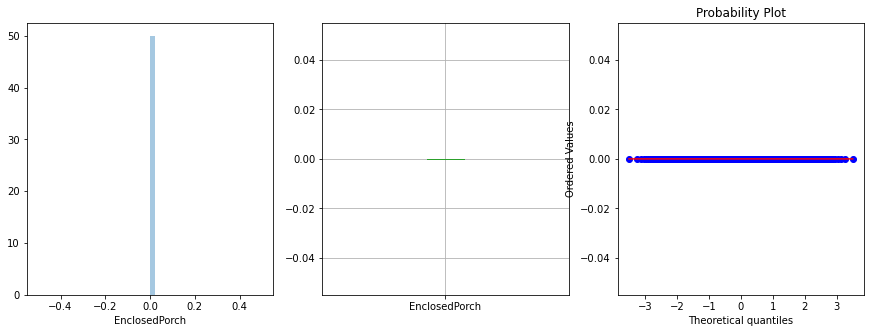

*****************************************************************************************************************************


C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


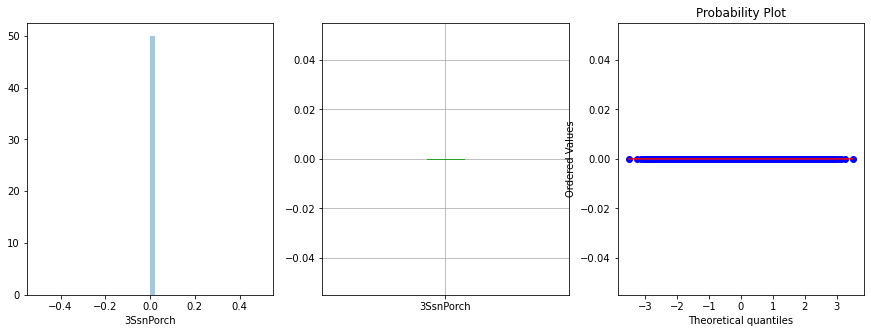

*****************************************************************************************************************************


C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


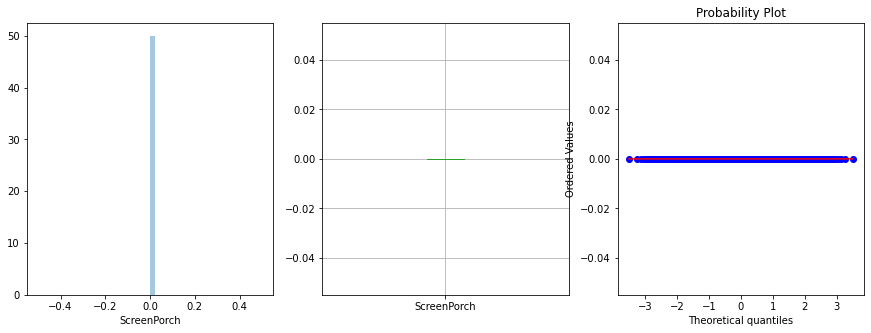

*****************************************************************************************************************************


C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


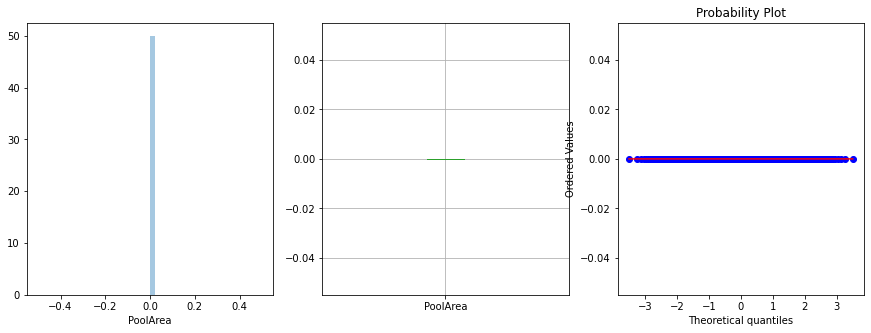

*****************************************************************************************************************************


C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


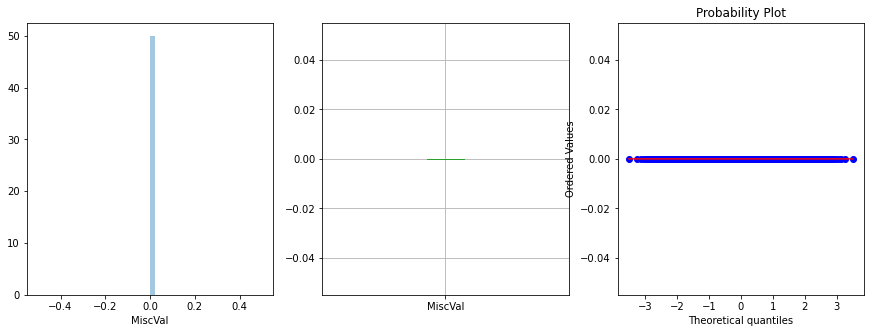

*****************************************************************************************************************************


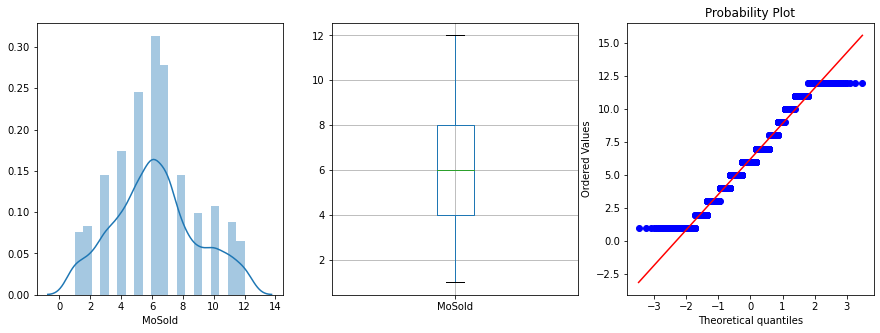

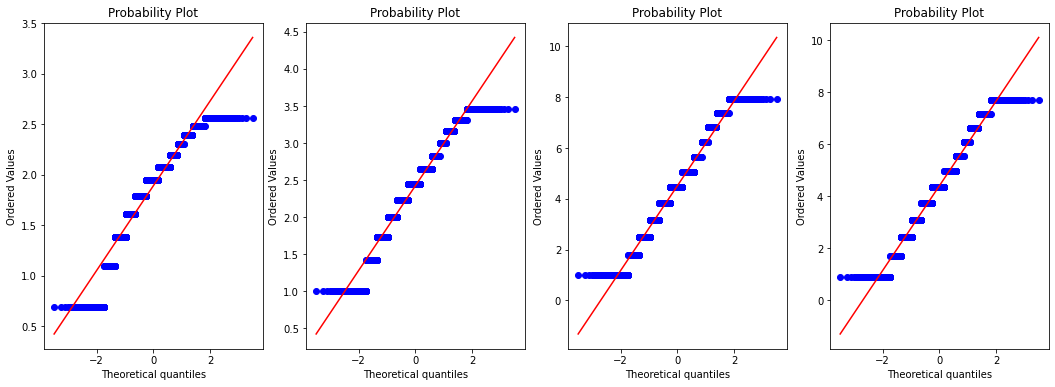

*****************************************************************************************************************************


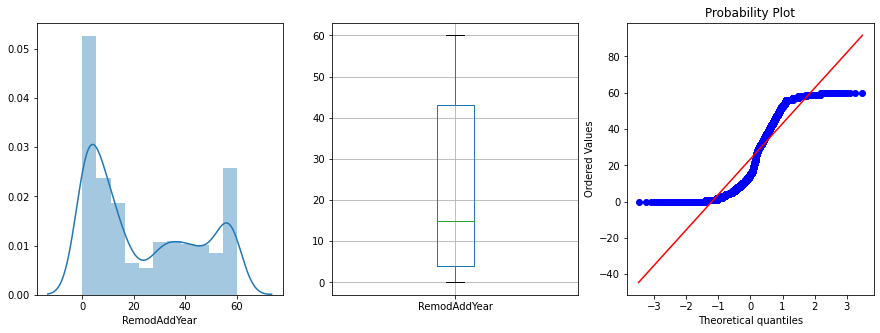

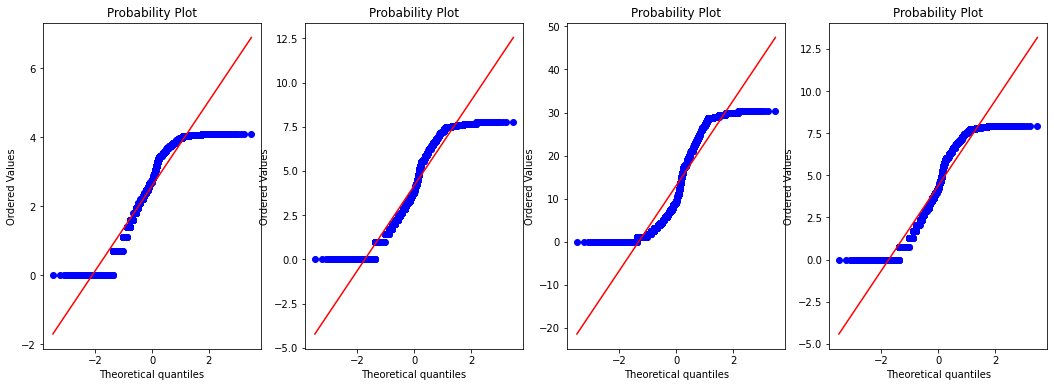

*****************************************************************************************************************************


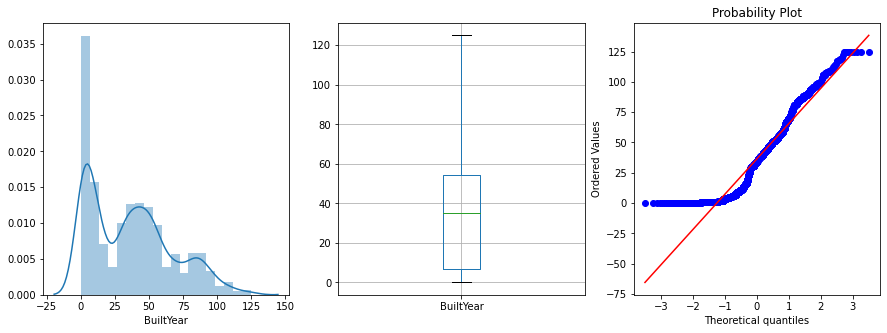

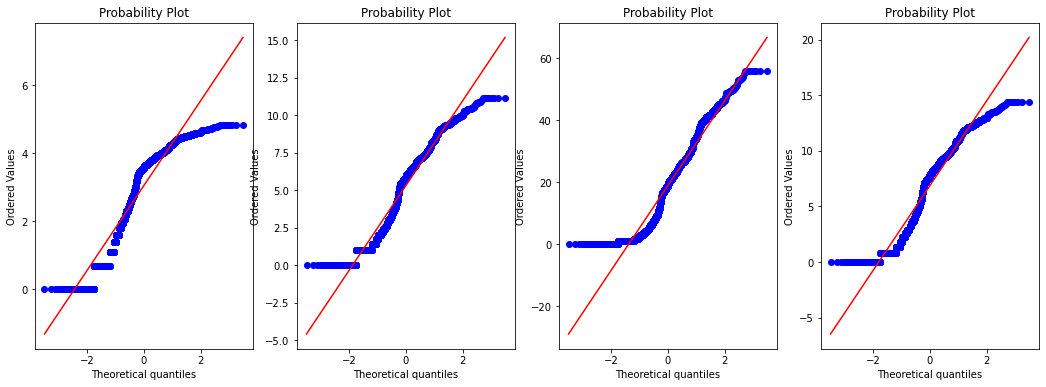

*****************************************************************************************************************************


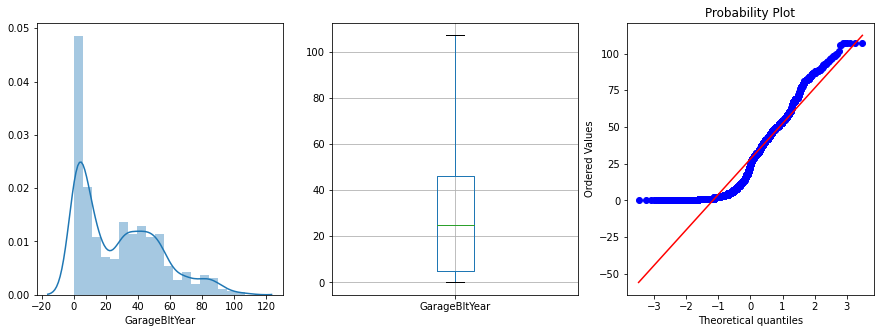

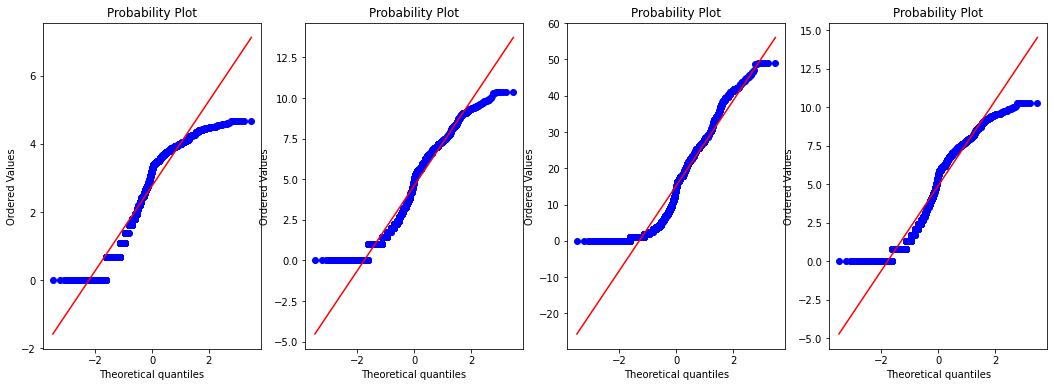

*****************************************************************************************************************************


In [31]:
column1 = [col for col in data1.columns if data1[col].dtypes!='O']

for col in column1:
    plot_data(data1, col)
    nor(data1, col)
    print("*"*125)

In [32]:
boxcox = ['BsmtUnfSF', '1stFlrSF', 'GrLivArea']
exp = ['BsmtFinSF1', '2ndFlrSF', 'GarageBltYear']
sqrt  = ['WoodDeckSF', 'OpenPorchSF', 'MasVnrArea', 'RemodAddYear']

In [33]:
for col in sqrt:
    data1[col] = data1[col]**(1/2)

for col in exp:
    data1[col] = data1[col]**(1/1.2)

for col in boxcox:
    data1[col],parameters = stat.boxcox(data1[col]+1)

In [34]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(data, 0.85)
print(len(set(corr_features)))

corr_features

1


{'GarageArea'}

In [35]:
data1 = data1.drop('GarageArea', axis=1)

In [36]:
train['RemodAddYear'] = train['YrSold']-train['YearRemodAdd']
train['BuiltYear'] = train['YrSold']-train['YearBuilt']
train['GarageBltYear'] = train['YrSold']-train['GarageYrBlt']
train.drop(['YearBuilt','YearRemodAdd', 'GarageYrBlt', 'YrSold'], axis=1, inplace=True)
print(train.shape)

abs(train.corr()['SalePrice']).sort_values(ascending=False)

(1460, 80)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
BuiltYear        0.523350
RemodAddYear     0.509079
GarageBltYear    0.487069
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

In [40]:
abs(train.corr()['SalePrice']).sort_values(ascending=False).index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'BuiltYear',
       'RemodAddYear', 'GarageBltYear', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF',
       'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr',
       'KitchenAbvGr', 'EnclosedPorch', 'ScreenPorch', 'PoolArea',
       'MSSubClass', 'OverallCond', 'MoSold', '3SsnPorch', 'LowQualFinSF',
       'Id', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2'],
      dtype='object')

In [42]:
data1 = data1.drop(['MSSubClass', 'OverallCond', 'MoSold', '3SsnPorch', 'LowQualFinSF',
                   'Id', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2'], axis=1)
data1.shape

(2919, 55)

In [43]:
data1.nunique().sort_values(ascending=True).head(15)

PoolArea         1
ScreenPorch      1
KitchenAbvGr     1
EnclosedPorch    1
GarageFinish     3
HalfBath         3
Fireplaces       3
BsmtFullBath     3
PavedDrive       3
GarageCars       4
FullBath         4
BsmtExposure     4
LandContour      4
BsmtQual         4
MasVnrType       4
dtype: int64

In [45]:
data1 = data1.drop(['PoolArea', 'ScreenPorch', 'KitchenAbvGr', 'EnclosedPorch'], axis=1)
data1.shape

(2919, 51)

In [46]:
data2 = pd.get_dummies(data1)
data2.shape

(2919, 213)

In [47]:
train.shape, test.shape

((1460, 80), (1459, 80))

In [48]:
df_train = data2[:1460]
df_test = data2[1460:]
target = train['SalePrice']

df_train.shape, df_test.shape, target.shape

((1460, 213), (1459, 213), (1460,))

In [49]:
## Always remember there way always be a chance of data leakage so we need to split the data first and then apply feature Engineering

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df_train, target, test_size=0.3, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1022, 213), (438, 213), (1022,), (438,))

In [50]:
import xgboost 

xgb = xgboost.XGBRegressor()

In [51]:
## Hyper Parameter Optimization by random search

learning_rate = [0.005, 0.01,0.025,0.05,0.1]
base_score = [0.01,0.25,0.5,0.75,1]
max_depth= [1,2,3,4,5]
min_child_weight = [0,1,2]
subsample = [0.5, 0.7]
colsample_bytree = [0.5, 0.7]
n_estimators = [1100,1150, 1200, 1250, 1350, 1500]
objective = ['reg:squarederror','reg:linear']
booster = ['gbtree','gblinear']


# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score,
    'subsample': subsample,
    'colsample_bytree': colsample_bytree,
    'objective': objective
    
    }

In [52]:
from sklearn.model_selection import KFold
cv=KFold(n_splits=5,random_state=None,shuffle=False)

# Set up the random search with 5-fold cross validation
from sklearn.model_selection import RandomizedSearchCV

random_cv = RandomizedSearchCV(estimator=xgb,
            param_distributions=hyperparameter_grid,
            cv=cv, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [53]:
random_cv.fit(X_train,y_train)

random_cv.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[20:05:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1100, n_jobs=12, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.7, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [67]:
xgb_final = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=1100, n_jobs=12, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.7, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [68]:
xgb_final.fit(X_train,y_train)

[20:09:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=1100, n_jobs=12, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.7, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [69]:
y_pred_xgb = xgb_final.predict(X_val)
print("Accuracy on Traing set: ",xgb_final.score(X_train,y_train))
print("Accuracy on Validation set: ",xgb_final.score(X_val,y_val))

Accuracy on Traing set:  0.9999329381331958
Accuracy on Validation set:  0.9222206620355289


In [70]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_val, y_pred_xgb))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_val, y_pred_xgb))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_val, y_pred_xgb)))
print('R Squared Error          : ', metrics.r2_score(y_val, y_pred_xgb))

		Error Table
Mean Absolute Error      :  15086.75257741153
Mean Squared  Error      :  542751512.9798658
Root Mean Squared  Error :  23297.027985987093
R Squared Error          :  0.9222206620355289


In [71]:
# df_Test.drop(['SalePrice'], axis=1, inplace=True)
df_test.shape

(1459, 213)

In [72]:
##Create Sample Submission file and Submit using xgb
pred = xgb_final.predict(df_test)
pred = pd.DataFrame(pred)
submission_file = pd.concat([test['Id'], pred], axis=1)
submission_file.columns=['Id','SalePrice']
submission_file.to_csv('sample_submission.csv',index=False)

In [73]:
## Hyper Parameter Optimization by random search

learning_rate = [0.005, 0.01,0.025,0.05,0.1]
loss = ['ls', 'lad', 'huber', 'quantile']
n_estimators = [1100,1150, 1200, 1250, 1350, 1500]
subsample = [0.5, 0.7]
min_samples_split = [2,4,6,8,10,12]
criterion = ['friedman_mse', 'mse', 'mae']
max_depth= [1,2,3,4,5]
max_features = ['auto', 'sqrt', 'log2']


# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'learning_rate':learning_rate,
    'loss': loss,
    'subsample': subsample,
    'min_samples_split': min_samples_split,
    'criterion': criterion,
    'max_depth': max_depth,
    'max_features': max_features
    }

In [74]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

GBoost = GradientBoostingRegressor()

In [75]:
from sklearn.model_selection import KFold
cv=KFold(n_splits=5,random_state=None,shuffle=False)

# Set up the random search with 5-fold cross validation
from sklearn.model_selection import RandomizedSearchCV

random_cv = RandomizedSearchCV(estimator=GBoost,
            param_distributions=hyperparameter_grid,
            cv=cv, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [76]:
random_cv.fit(X_train,y_train)

random_cv.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GradientBoostingRegressor(learning_rate=0.01, max_depth=5, max_features='sqrt',
                          min_samples_split=10, n_estimators=1250,
                          subsample=0.7)

In [77]:
random_cv.best_params_

{'subsample': 0.7,
 'n_estimators': 1250,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 5,
 'loss': 'ls',
 'learning_rate': 0.01,
 'criterion': 'friedman_mse'}

In [81]:
GBoost_final = GradientBoostingRegressor(subsample =  0.7, n_estimators = 1250, min_samples_split = 10, max_features = 'sqrt',
max_depth = 5, loss = 'ls', learning_rate =  0.01, criterion = 'friedman_mse')

In [82]:
GBoost_final.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, max_features='sqrt',
                          min_samples_split=10, n_estimators=1250,
                          subsample=0.7)

In [83]:
y_pred_GBoost = GBoost_final.predict(X_val)
print("Accuracy on Traing set: ",GBoost_final.score(X_train,y_train))
print("Accuracy on Validation set: ",GBoost_final.score(X_val,y_val))

Accuracy on Traing set:  0.9849513923219835
Accuracy on Validation set:  0.9203009011759876


In [84]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_val, y_pred_GBoost))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_val, y_pred_GBoost))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_val, y_pred_GBoost)))
print('R Squared Error          : ', metrics.r2_score(y_val, y_pred_GBoost))

		Error Table
Mean Absolute Error      :  15097.654313736386
Mean Squared  Error      :  556147784.2563258
Root Mean Squared  Error :  23582.785761150564
R Squared Error          :  0.9203009011759876


In [85]:
##Create Sample Submission file and Submit using xgb
pred = GBoost_final.predict(df_test)
pred = pd.DataFrame(pred)
submission_file = pd.concat([test['Id'], pred], axis=1)
submission_file.columns=['Id','SalePrice']
submission_file.to_csv('sample_submission_GBoost.csv',index=False)